## Import Package

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime as dt
import calendar
from pandas.api.types import CategoricalDtype

# Import module for data visualization
from plotnine import *
import plotnine

from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Load Data

### Data Customer

In [ ]:
customer = pd.read_csv('/content/drive/MyDrive/Final Projek Yaman/Mockup Datasets/customer.csv')

In [ ]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   customer_id         100000 non-null  int64  
 1   first_name          100000 non-null  object 
 2   last_name           100000 non-null  object 
 3   username            100000 non-null  object 
 4   email               100000 non-null  object 
 5   gender              100000 non-null  object 
 6   birthdate           100000 non-null  object 
 7   device_type         100000 non-null  object 
 8   device_id           100000 non-null  object 
 9   device_version      100000 non-null  object 
 10  home_location_lat   100000 non-null  float64
 11  home_location_long  100000 non-null  float64
 12  home_location       100000 non-null  object 
 13  home_country        100000 non-null  object 
 14  first_join_date     100000 non-null  object 
dtypes: float64(2), int64(1), object(12)

In [ ]:
def convert_date(dataframe, colname):
  
  dataframe[colname] = pd.to_datetime(dataframe[colname])

  return dataframe

In [ ]:
customer = convert_date(customer, "first_join_date")
customer = convert_date(customer, "birthdate")

In [ ]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   customer_id         100000 non-null  int64         
 1   first_name          100000 non-null  object        
 2   last_name           100000 non-null  object        
 3   username            100000 non-null  object        
 4   email               100000 non-null  object        
 5   gender              100000 non-null  object        
 6   birthdate           100000 non-null  datetime64[ns]
 7   device_type         100000 non-null  object        
 8   device_id           100000 non-null  object        
 9   device_version      100000 non-null  object        
 10  home_location_lat   100000 non-null  float64       
 11  home_location_long  100000 non-null  float64       
 12  home_location       100000 non-null  object        
 13  home_country        100000 non

In [ ]:
customer

,customer_id,first_name,last_name,username,email,gender,birthdate,device_type,device_id,device_version,home_location_lat,home_location_long,home_location,home_country,first_join_date
0,2870,Lala,Maryati,671a0865-ac4e-4dc4-9c4f-c286a1176f7e,671a0865_ac4e_4dc4_9c4f_c286a1176f7e@startupca...,F,1996-06-14,iOS,c9c0de76-0a6c-4ac2-843f-65264ab9fe63,iPhone; CPU iPhone OS 14_2_1 like Mac OS X,-1.043345,101.360523,Sumatera Barat,Indonesia,2019-07-21
1,8193,Maimunah,Laksmiwati,83be2ba7-8133-48a4-bbcb-b46a2762473f,83be2ba7_8133_48a4_bbcb_b46a2762473f@zakyfound...,F,1993-08-16,Android,fb331c3d-f42e-40fe-afe2-b4b73a8a6e25,Android 2.2.1,-6.212489,106.818850,Jakarta Raya,Indonesia,2017-07-16
2,7279,Bakiman,Simanjuntak,3250e5a3-1d23-4675-a647-3281879d42be,3250e5a3_1d23_4675_a647_3281879d42be@startupca...,M,1989-01-23,iOS,d13dde0a-6ae1-43c3-83a7-11bbb922730b,iPad; CPU iPad OS 4_2_1 like Mac OS X,-8.631607,116.428436,Nusa Tenggara Barat,Indonesia,2020-08-23
3,88813,Cahyadi,Maheswara,df797edf-b465-4a80-973b-9fbb612260c2,df797edf_b465_4a80_973b_9fbb612260c2@zakyfound...,M,1991-01-05,iOS,f4c18515-c5be-419f-8142-f037be47c9cd,iPad; CPU iPad OS 14_2 like Mac OS X,1.299332,115.774934,Kalimantan Timur,Indonesia,2021-10-03
4,82542,Irnanto,Wijaya,36ab08e1-03de-42a8-9e3b-59528c798824,36ab08e1_03de_42a8_9e3b_59528c798824@startupca...,M,2000-07-15,iOS,e46e4c36-4630-4736-8fcf-663db29ca3b0,iPhone; CPU iPhone OS 10_3_3 like Mac OS X,-2.980807,114.924675,Kalimantan Selatan,Indonesia,2021-04-11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,34743,Manah,Mustofa,bf989ab1-d7eb-4ad5-b4bc-29e3cf69b35c,bf989ab1_d7eb_4ad5_b4bc_29e3cf69b35c@startupca...,M,2000-11-17,Android,fa1914a5-0c12-4393-8d6c-af4e4a4de6aa,Android 4.3.1,-5.203523,105.635530,Lampung,Indonesia,2020-10-17
99996,72065,Danu,Pradana,4af2b3d5-c573-4032-b29c-24782745a2f6,4af2b3d5_c573_4032_b29c_24782745a2f6@startupca...,M,1998-03-30,Android,d8234d67-6954-4e05-8293-d37ef25bfd7e,Android 8.0.0,4.474702,95.904876,Aceh,Indonesia,2017-11-25
99997,32818,Talia,Aryani,af0edbfa-f354-4765-813b-b9f151022555,af0edbfa_f354_4765_813b_b9f151022555@startupca...,F,1993-01-12,Android,3c586f64-aab7-4dd6-be94-5d47c6361081,Android 11,-3.330376,127.028348,Maluku,Indonesia,2018-09-01
99998,75597,Ajimat,Mansur,35cd82f3-6b86-42a2-bb15-933770d7f250,35cd82f3_6b86_42a2_bb15_933770d7f250@startupca...,M,2000-09-13,Android,3b209c58-d305-4b46-9363-b90a3914f008,Android 7.1,-2.173114,101.495913,Jambi,Indonesia,2020-05-31


### Data Produk

In [ ]:
product = pd.read_csv("/content/drive/MyDrive/Final Projek Yaman/Mockup Datasets/product.csv", on_bad_lines = "skip" )

In [ ]:
product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44424 entries, 0 to 44423
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  44424 non-null  int64  
 1   gender              44424 non-null  object 
 2   masterCategory      44424 non-null  object 
 3   subCategory         44424 non-null  object 
 4   articleType         44424 non-null  object 
 5   baseColour          44409 non-null  object 
 6   season              44403 non-null  object 
 7   year                44423 non-null  float64
 8   usage               44107 non-null  object 
 9   productDisplayName  44417 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 3.4+ MB


In [ ]:
product.head()

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011.0,Casual,Turtle Check Men Navy Blue Shirt
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012.0,Casual,Peter England Men Party Blue Jeans
2,59263,Women,Accessories,Watches,Watches,Silver,Winter,2016.0,Casual,Titan Women Silver Watch
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011.0,Casual,Manchester United Men Solid Black Track Pants
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012.0,Casual,Puma Men Grey T-shirt


### Data Transaksi

In [ ]:
transaksi = pd.read_csv('/content/drive/MyDrive/Final Projek Yaman/Mockup Datasets/transactions.csv')

In [ ]:
transaksi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 852584 entries, 0 to 852583
Data columns (total 14 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   created_at              852584 non-null  object 
 1   customer_id             852584 non-null  int64  
 2   booking_id              852584 non-null  object 
 3   session_id              852584 non-null  object 
 4   product_metadata        852584 non-null  object 
 5   payment_method          852584 non-null  object 
 6   payment_status          852584 non-null  object 
 7   promo_amount            852584 non-null  int64  
 8   promo_code              326536 non-null  object 
 9   shipment_fee            852584 non-null  int64  
 10  shipment_date_limit     852584 non-null  object 
 11  shipment_location_lat   852584 non-null  float64
 12  shipment_location_long  852584 non-null  float64
 13  total_amount            852584 non-null  int64  
dtypes: float64(2), int64

In [ ]:
transaksi = convert_date(transaksi, "shipment_date_limit")
transaksi = convert_date(transaksi, "created_at")

In [ ]:
transaksi

,created_at,customer_id,booking_id,session_id,product_metadata,payment_method,payment_status,promo_amount,promo_code,shipment_fee,shipment_date_limit,shipment_location_lat,shipment_location_long,total_amount
0,2018-07-29 15:22:01.458193+00:00,5868,186e2bee-0637-4710-8981-50c2d737bc42,3abaa6ce-e320-4e51-9469-d9f3fa328e86,"[{'product_id': 54728, 'quantity': 1, 'item_pr...",Debit Card,Success,1415,WEEKENDSERU,10000,2018-08-03 05:07:24.812676+00:00,-8.227893,111.969107,199832
1,2018-07-30 12:40:22.365620+00:00,4774,caadb57b-e808-4f94-9e96-8a7d4c9898db,2ee5ead1-f13e-4759-92df-7ff48475e970,"[{'product_id': 16193, 'quantity': 1, 'item_pr...",Credit Card,Success,0,NaN,10000,2018-08-03 01:29:03.415705+00:00,3.013470,107.802514,155526
2,2018-09-15 11:51:17.365620+00:00,4774,6000fffb-9c1a-4f4a-9296-bc8f6b622b50,93325fb6-eb00-4268-bb0e-6471795a0ad0,"[{'product_id': 53686, 'quantity': 4, 'item_pr...",OVO,Success,0,NaN,10000,2018-09-18 08:41:49.422380+00:00,-2.579428,115.743885,550696
3,2018-11-01 11:23:48.365620+00:00,4774,f5e530a7-4350-4cd1-a3bc-525b5037bcab,bcad5a61-1b67-448d-8ff4-781d67bc56e4,"[{'product_id': 20228, 'quantity': 1, 'item_pr...",Credit Card,Success,0,NaN,0,2018-11-05 17:42:27.954235+00:00,-3.602334,120.363824,271012
4,2018-12-18 11:20:30.365620+00:00,4774,0efc0594-dbbf-4f9a-b0b0-a488cfddf8a2,df1042ab-13e6-4072-b9d2-64a81974c51a,"[{'product_id': 55220, 'quantity': 1, 'item_pr...",Credit Card,Success,0,NaN,0,2018-12-23 17:24:07.361785+00:00,-3.602334,120.363824,198753
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
852579,2021-09-21 22:10:05.074873+00:00,25121,66f02fa4-c62e-497a-8b6e-be239009b50a,484eecde-9f4a-42de-a8df-7ce6668101f4,"[{'product_id': 30642, 'quantity': 2, 'item_pr...",Debit Card,Failed,0,NaN,0,2021-09-27 00:43:40.992167+00:00,-6.869535,111.077145,226820
852580,2021-12-09 07:35:18.222046+00:00,34829,ccde6b83-ee42-4cce-b2cd-976574886eac,954e1211-4d45-4d0b-ba84-53e80119592c,"[{'product_id': 19394, 'quantity': 1, 'item_pr...",OVO,Success,5010,AZ2022,10000,2021-12-12 07:52:44.803822+00:00,-8.677264,115.176947,359203
852581,2021-12-11 01:20:36.944593+00:00,99645,5bcd3434-1dc6-44bb-ae63-fd19714cbd6c,e6e6c108-abd0-49a2-b0a5-691117f9cfe1,"[{'product_id': 13079, 'quantity': 4, 'item_pr...",Credit Card,Success,2181,WEEKENDSERU,5000,2021-12-12 13:28:22.848703+00:00,-6.185498,106.831093,1158159
852582,2019-12-18 11:01:09.623382+00:00,87319,af7f291a-b01b-4bfd-89a9-237b16368b15,bb6e5426-a3f3-426a-b99d-79173eaa234b,"[{'product_id': 11312, 'quantity': 1, 'item_pr...",Credit Card,Success,4503,AZ2022,0,2019-12-23 22:56:46.831720+00:00,-7.155977,110.891858,184143


### Data Click Stream

In [ ]:
click_stream = pd.read_csv('/content/drive/MyDrive/Final Projek Yaman/Mockup Datasets/click_stream.csv')

In [ ]:
click_stream.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12833602 entries, 0 to 12833601
Data columns (total 6 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   session_id      object
 1   event_name      object
 2   event_time      object
 3   event_id        object
 4   traffic_source  object
 5   event_metadata  object
dtypes: object(6)
memory usage: 587.5+ MB


In [ ]:
click_stream.head()

,session_id,event_name,event_time,event_id,traffic_source,event_metadata
0,fb0abf9e-fd1a-44dd-b5c0-2834d5a4b81c,HOMEPAGE,2019-09-06T15:54:32.821085Z,9c4388c4-c95b-4678-b5ca-e9cbc0734109,MOBILE,NaN
1,fb0abf9e-fd1a-44dd-b5c0-2834d5a4b81c,SCROLL,2019-09-06T16:03:57.821085Z,4690e1f5-3f99-42d3-84a5-22c4c4d8500a,MOBILE,NaN
2,7d440441-e67a-4d36-b324-80ffd636d166,HOMEPAGE,2019-09-01T12:05:10.322763Z,88aeaeb5-ec98-4859-852c-8abb483faf31,MOBILE,NaN
3,7d440441-e67a-4d36-b324-80ffd636d166,ADD_TO_CART,2019-09-01T12:06:33.322763Z,934e306e-ecc6-472f-9ccb-12c8536910a2,MOBILE,"{'product_id': 15315, 'quantity': 4, 'item_pri..."
4,7d440441-e67a-4d36-b324-80ffd636d166,BOOKING,2019-09-01T12:15:29.425431Z,9f4767a1-40fa-4c9c-9524-dfad18634d56,MOBILE,{'payment_status': 'Success'}


In [ ]:
click_stream.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12833602 entries, 0 to 12833601
Data columns (total 6 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   session_id      object
 1   event_name      object
 2   event_time      object
 3   event_id        object
 4   traffic_source  object
 5   event_metadata  object
dtypes: object(6)
memory usage: 587.5+ MB


# EDA

## Event Name from ClickStream Dataset

In [ ]:
click_stream['event_name'].unique()

array(['HOMEPAGE', 'SCROLL', 'ADD_TO_CART', 'BOOKING', 'SEARCH',
       'ITEM_DETAIL', 'ADD_PROMO', 'CLICK', 'PROMO_PAGE'], dtype=object)

In [ ]:
# event name with the most customers
cs = click_stream.groupby(['event_name']).count()['event_id'].reset_index().sort_values(by='event_id',ascending=False)
cs.rename(columns = {'event_id':'Total'}, inplace=True)
cs

,event_name,Total
3,CLICK,2498038
4,HOMEPAGE,2487126
1,ADD_TO_CART,1937157
7,SCROLL,1663571
5,ITEM_DETAIL,1290396
8,SEARCH,1173266
2,BOOKING,852582
6,PROMO_PAGE,604931
0,ADD_PROMO,326535


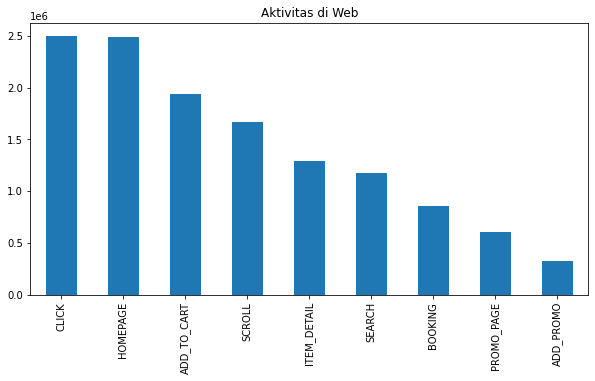

In [ ]:
plt.figure(figsize=(10,5))
click_stream['event_name'].value_counts().plot.bar()
plt.title("Aktivitas di Web")
plt.show()

In [ ]:
cs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9 entries, 3 to 0
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   event_name  9 non-null      object
 1   Total       9 non-null      int64 
dtypes: int64(1), object(1)
memory usage: 216.0+ bytes


## Payment Method from Transaksi dataset

In [ ]:
transaksi['payment_method'].unique()

array(['Debit Card', 'Credit Card', 'OVO', 'LinkAja', 'Gopay'],
      dtype=object)

In [ ]:
# payment method with the most customers
payment = transaksi.groupby(['payment_method']).count()['customer_id'].reset_index().sort_values(by='customer_id',ascending=False)
payment.rename(columns = {'customer_id':'total'}, inplace=True)
payment

,payment_method,total
0,Credit Card,299586
2,Gopay,171334
4,OVO,169066
1,Debit Card,137269
3,LinkAja,75329


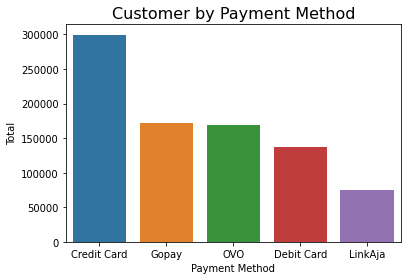

In [ ]:
# let's check with the chart
visual = sns.barplot(data= payment, x='payment_method', y = 'total')
visual.set_xlabel('Payment Method',fontsize = 10)
visual.set_ylabel('Total', fontsize = 10)
plt.title('Customer by Payment Method',fontsize = 16)
plt.show()

In [ ]:
payment.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5 entries, 0 to 3
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   payment_method  5 non-null      object
 1   total           5 non-null      int64 
dtypes: int64(1), object(1)
memory usage: 292.0+ bytes


## Top 10 Customer Home Location from Customer Dataset

In [ ]:
customer_location = customer.loc[:, ["home_location"]]

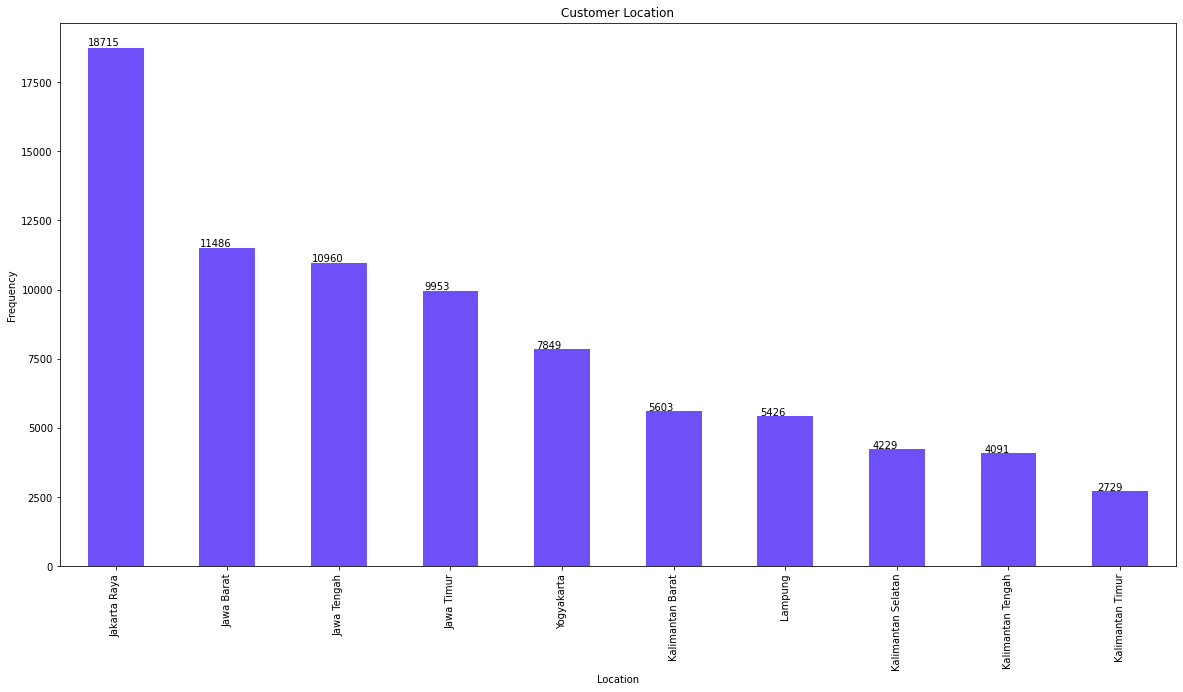

In [ ]:
ax = customer_location['home_location'].value_counts().head(10).plot(kind='bar',
                                    figsize=(20,10),
                                    title="Customer Location",
                                    color = "#6f50f8")
ax.set_xlabel("Location")
ax.set_ylabel("Frequency")

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
plt.show()

In [ ]:
customer_location.value_counts().head(10)

,home_location
0,Sumatera Barat
1,Jakarta Raya
2,Nusa Tenggara Barat
3,Kalimantan Timur
4,Kalimantan Selatan


In [ ]:
location_cust = customer_location['home_location'].value_counts().head(10)
location_cust

Jakarta Raya          18715
Jawa Barat            11486
Jawa Tengah           10960
Jawa Timur             9953
Yogyakarta             7849
Kalimantan Barat       5603
Lampung                5426
Kalimantan Selatan     4229
Kalimantan Tengah      4091
Kalimantan Timur       2729
Name: home_location, dtype: int64

## Customer Gender from Customer Dataset

In [ ]:
customer_gender = customer.loc[:, ["gender"]]

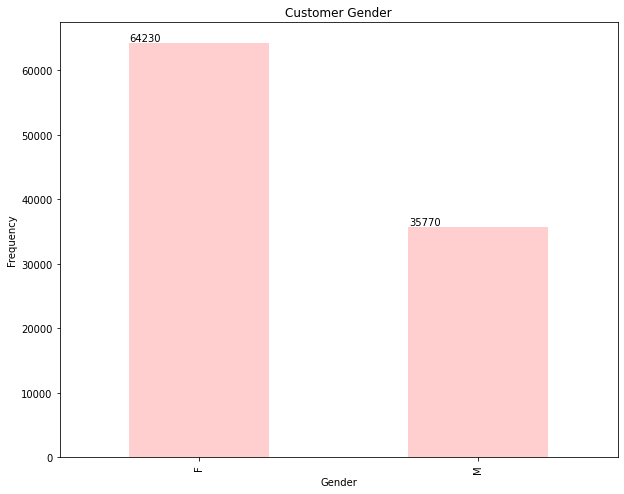

In [ ]:
ax = customer_gender['gender'].value_counts().plot(kind='bar',
                                    figsize=(10,8),
                                    title="Customer Gender",
                                    color = "#ffcece")
ax.set_xlabel("Gender")
ax.set_ylabel("Frequency")

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
plt.show()

## Distribusi Customer Berdasarkan Payment Status from Transaksi Dataset

In [ ]:
transaksi = pd.read_csv('/content/drive/MyDrive/Final Projek Yaman/Mockup Datasets/transactions.csv')

In [ ]:
transaksi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 852584 entries, 0 to 852583
Data columns (total 14 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   created_at              852584 non-null  object 
 1   customer_id             852584 non-null  int64  
 2   booking_id              852584 non-null  object 
 3   session_id              852584 non-null  object 
 4   product_metadata        852584 non-null  object 
 5   payment_method          852584 non-null  object 
 6   payment_status          852584 non-null  object 
 7   promo_amount            852584 non-null  int64  
 8   promo_code              326536 non-null  object 
 9   shipment_fee            852584 non-null  int64  
 10  shipment_date_limit     852584 non-null  object 
 11  shipment_location_lat   852584 non-null  float64
 12  shipment_location_long  852584 non-null  float64
 13  total_amount            852584 non-null  int64  
dtypes: float64(2), int64

In [ ]:
transaksi['payment_status'].unique()

array(['Success', 'Failed'], dtype=object)

In [ ]:
# find Distibution customers by Payment Status
distribusi_payment_status = transaksi.groupby(['payment_status']).count()['customer_id'].reset_index().sort_values(by='customer_id',ascending=False)
distribusi_payment_status.rename(columns = {'customer_id':'Jumlah Customers'}, inplace=True)
distribusi_payment_status['percentage'] = distribusi_payment_status['Jumlah Customers']/distribusi_payment_status['Jumlah Customers'].sum()
distribusi_payment_status

,payment_status,Jumlah Customers,percentage
1,Success,815964,0.957048
0,Failed,36620,0.042952


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import DataFrame
import matplotlib.pyplot as plt
import numpy as np

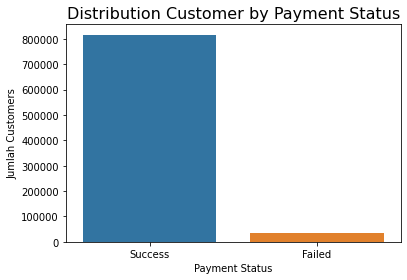

In [ ]:
# let's check with the chart
visual = sns.barplot(data= distribusi_payment_status, x='payment_status', y = 'Jumlah Customers')
visual.set_xlabel('Payment Status',fontsize = 10)
visual.set_ylabel('Jumlah Customers', fontsize = 10)
plt.title('Distribution Customer by Payment Status',fontsize = 16)
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.


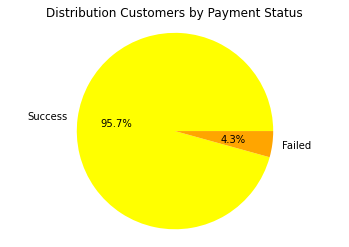

In [ ]:
Data = {'Percentage': [95.7048,4.2952]}
df = DataFrame(Data,columns=['Percentage'])

my_labels = ["Success","Failed"]
my_colors = ["yellow", "orange"]
plt.pie(df,labels=my_labels,colors=my_colors, autopct='%1.1f%%')
plt.title('Distribution Customers by Payment Status')
plt.axis('equal')
plt.show()

## Distribusi Jumlah Customer Berdasarkan 'Search Keyword' from ClickStream Dataset

In [ ]:
click_stream.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12833602 entries, 0 to 12833601
Data columns (total 6 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   session_id      object
 1   event_name      object
 2   event_time      object
 3   event_id        object
 4   traffic_source  object
 5   event_metadata  object
dtypes: object(6)
memory usage: 587.5+ MB


In [ ]:
click_stream.head()

,session_id,event_name,event_time,event_id,traffic_source,event_metadata
0,fb0abf9e-fd1a-44dd-b5c0-2834d5a4b81c,HOMEPAGE,2019-09-06T15:54:32.821085Z,9c4388c4-c95b-4678-b5ca-e9cbc0734109,MOBILE,NaN
1,fb0abf9e-fd1a-44dd-b5c0-2834d5a4b81c,SCROLL,2019-09-06T16:03:57.821085Z,4690e1f5-3f99-42d3-84a5-22c4c4d8500a,MOBILE,NaN
2,7d440441-e67a-4d36-b324-80ffd636d166,HOMEPAGE,2019-09-01T12:05:10.322763Z,88aeaeb5-ec98-4859-852c-8abb483faf31,MOBILE,NaN
3,7d440441-e67a-4d36-b324-80ffd636d166,ADD_TO_CART,2019-09-01T12:06:33.322763Z,934e306e-ecc6-472f-9ccb-12c8536910a2,MOBILE,"{'product_id': 15315, 'quantity': 4, 'item_pri..."
4,7d440441-e67a-4d36-b324-80ffd636d166,BOOKING,2019-09-01T12:15:29.425431Z,9f4767a1-40fa-4c9c-9524-dfad18634d56,MOBILE,{'payment_status': 'Success'}


In [ ]:
click_metadata = click_stream[click_stream["event_metadata"].notnull()]

In [ ]:
#Gabungin by index
click_stream_metadata =pd.concat([click_metadata,
                        click_metadata["event_metadata"].head(1000000).apply(lambda x: pd.Series(eval(x)))
                        ], axis = 1
)

In [ ]:
click_stream.shape[0]

In [ ]:
click_stream["event_id"].nunique() == click_stream.shape[0]

In [ ]:
click_stream_metadata['search_keywords'].unique()

In [ ]:
# find Distibution customers by Payment Status
distribusi_search_keywords = click_stream_metadata.groupby(['search_keywords']).count()['event_id'].reset_index().sort_values(by='event_id',ascending=False)
distribusi_search_keywords.rename(columns = {'event_id':'Jumlah Customers'}, inplace=True)
distribusi_search_keywords

In [ ]:
# let's check with the chart
visual = sns.barplot(data= distribusi_search_keywords, x='Jumlah Customers', y = 'search_keywords' )
visual.set_ylabel('search_keywords',fontsize = 10)
visual.set_xlabel('Jumlah Customers', fontsize = 10)
plt.title('Distribution Customer by Search Keywords',fontsize = 16)
plt.show()

## Total Pengeluaran Tertinggi & Terendah per Customer from Transaksi Dataset

In [ ]:
df = transaksi.groupby('customer_id')['total_amount'].sum()
df = pd.DataFrame(test)
df

In [ ]:
df.sort_values(by=['total_amount'],ascending=True)

In [ ]:
transaksi['total_amount'].sum()

In [ ]:
#Persentase 5 customer dengan pengeluaran terbanyak
((320061849+297669495+256479120+252443713+251399384)/468850022169)*100

In [ ]:
#Persentase 5 customer dengan pengeluaran terdikit
((27450+29809+31270+34118+34726)/468850022169)*100

## Kuantitas Pembelian oleh Customer from Transaksi Dataset

In [ ]:
transaksi.loc[:,['payment_status','customer_id']]

In [ ]:
test2 = transaksi.groupby('customer_id')['payment_status'].count()
df2 = pd.DataFrame(test2)
df2 = df2.sort_values(by=['payment_status'],ascending=False)
df2

In [ ]:
#Persentase customer yang sukses melakukan pembelian
(815964/(815964+36620))*100

In [ ]:
conditions = [
 (df2['payment_status'] >= 100),
 (df2['payment_status'] >= 10) & (df2['payment_status'] < 100),
 (df2['payment_status'] < 10)
 ]

values = ['customer A', 'customer B', 'customer C']

df2['Tier'] = np.select(conditions, values)
df2

In [ ]:
ax = df2['Tier'].value_counts().plot(kind='bar',
                                    figsize=(14,8),
                                    title="Tipe Customer Per Pembelian")
ax.set_xlabel("Costumer Tier")
ax.set_ylabel("Frequency")

In [ ]:
sum(df2.payment_status == 1)

In [ ]:
df4 = df2.groupby(['Tier'])['Tier'].count()
print(df4)

In [ ]:
(10241/99999)*100

## Distribusi Customer Terhadap Penggunaan Kode Promo from Transaksi Dataset

In [ ]:
transaksi['promo_code'].unique()

In [ ]:
# Jumlah Customer yang Menggunakan Kode Promo
kode_promo = transaksi.groupby(['promo_code']).count()['customer_id'].reset_index().sort_values(by='customer_id',ascending=False)
kode_promo.rename(columns = {'customer_id':'Jumlah Pengguna'}, inplace=True)
kode_promo

In [ ]:
# Visualisasi
view = sns.barplot(data= kode_promo, x='promo_code', y = 'Jumlah Pengguna')
plt.title('Penggunaan Kode Promo',fontsize = 16)
plt.figure(figsize=(5,5))
plt.show()

In [ ]:
plt.figure(figsize=(10,5))
transaction['promo_code'].value_counts().plot.bar()
plt.title("Penggunaan Kode Promo")
plt.show()

## Sebaran Jumlah Produk Berdasarkan Gender from Produk Dataset

In [ ]:
produk['gender'].unique()

In [ ]:
# Sebaran Produk Berdasarkan Gender
produk_g = produk.groupby(['gender']).count()['productDisplayName'].reset_index().sort_values(by='productDisplayName',ascending=False)
produk_g.rename(columns = {'productDisplayName':'Jumlah Produk'}, inplace=True)
produk_g

In [ ]:
# Visualisasi
plot = sns.barplot(data= produk_g, x='gender', y = 'Jumlah Produk')
plt.title('Jumlah Produk Berdasarkan Gender',fontsize = 16)
plt.figure(figsize=(5,5))
plt.show()

## Product Category from Produk Dataset

In [ ]:
produk['masterCategory'].value_counts()

In [ ]:
plt.figure(figsize=(10,5))
sns.set_style("darkgrid")
ax = product['masterCategory'].value_counts()[0:10].plot(kind='bar', color = "#6f50f8", alpha=0.8)
ax.set_title("Product Category")
ax.set_xlabel("Category")
ax.set_ylabel("Total Products")
plt.show()

## Product Sub Category from Produk Dataset

In [ ]:
produk['subCategory'].value_counts()

In [ ]:
plt.figure(figsize=(10,5))
sns.set_style("darkgrid")
ax = product['subCategory'].value_counts()[0:10].plot(kind='bar', color = 'black', alpha=0.8)
ax.set_title("Top 10 Product Subcategory")
ax.set_xlabel("Subcategory")
ax.set_ylabel("Total Products")
plt.show()

In [ ]:
plt.figure(figsize=(20,10))
product['subCategory'].value_counts()[:10].plot.pie(autopct='%1.1f%%',
        startangle=90, cmap='tab20')
plt.title("Top 10 Product Subcategory",size=14, weight='bold')

## Product by Usage from Produk Dataset

In [ ]:
produk['usage'].value_counts()

In [ ]:
products_byusage = product[['usage', 'id']].groupby('usage').count().sort_values('id', ascending = False).reset_index()
products_byusage.head(10)

In [ ]:
plt.figure(figsize=(12,8))
sns.barplot(x='usage', y = 'id', data = products_byusage.head(10))
plt.title('Distribution Product by Usage')
plt.xlabel('Usage')
plt.ylabel('Number of Product')

#Variabel yang akan Digunakan

## 1. **Age Category** 

In [ ]:
customer["birthdate"] = customer["birthdate"].astype('datetime64')

In [ ]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   customer_id         100000 non-null  int64         
 1   first_name          100000 non-null  object        
 2   last_name           100000 non-null  object        
 3   username            100000 non-null  object        
 4   email               100000 non-null  object        
 5   gender              100000 non-null  object        
 6   birthdate           100000 non-null  datetime64[ns]
 7   device_type         100000 non-null  object        
 8   device_id           100000 non-null  object        
 9   device_version      100000 non-null  object        
 10  home_location_lat   100000 non-null  float64       
 11  home_location_long  100000 non-null  float64       
 12  home_location       100000 non-null  object        
 13  home_country        100000 non

In [ ]:
from datetime import date
def calculateAge(born):
    today = date.today()
    try:
        birthday = born.replace(year = today.year)
 
    # raised when birth date is February 29
    # and the current year is not a leap year
    except ValueError:
        birthday = born.replace(year = today.year,
                  month = born.month + 1, day = 1)
 
    if birthday > today:
        return today.year - born.year - 1
    else:
        return today.year - born.year

customer["Age"] = customer["birthdate"].apply(calculateAge)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


In [ ]:
customer.head()

,customer_id,first_name,last_name,username,email,gender,birthdate,device_type,device_id,device_version,home_location_lat,home_location_long,home_location,home_country,first_join_date,Age
0,2870,Lala,Maryati,671a0865-ac4e-4dc4-9c4f-c286a1176f7e,671a0865_ac4e_4dc4_9c4f_c286a1176f7e@startupca...,F,1996-06-14,iOS,c9c0de76-0a6c-4ac2-843f-65264ab9fe63,iPhone; CPU iPhone OS 14_2_1 like Mac OS X,-1.043345,101.360523,Sumatera Barat,Indonesia,2019-07-21,26
1,8193,Maimunah,Laksmiwati,83be2ba7-8133-48a4-bbcb-b46a2762473f,83be2ba7_8133_48a4_bbcb_b46a2762473f@zakyfound...,F,1993-08-16,Android,fb331c3d-f42e-40fe-afe2-b4b73a8a6e25,Android 2.2.1,-6.212489,106.818850,Jakarta Raya,Indonesia,2017-07-16,29
2,7279,Bakiman,Simanjuntak,3250e5a3-1d23-4675-a647-3281879d42be,3250e5a3_1d23_4675_a647_3281879d42be@startupca...,M,1989-01-23,iOS,d13dde0a-6ae1-43c3-83a7-11bbb922730b,iPad; CPU iPad OS 4_2_1 like Mac OS X,-8.631607,116.428436,Nusa Tenggara Barat,Indonesia,2020-08-23,33
3,88813,Cahyadi,Maheswara,df797edf-b465-4a80-973b-9fbb612260c2,df797edf_b465_4a80_973b_9fbb612260c2@zakyfound...,M,1991-01-05,iOS,f4c18515-c5be-419f-8142-f037be47c9cd,iPad; CPU iPad OS 14_2 like Mac OS X,1.299332,115.774934,Kalimantan Timur,Indonesia,2021-10-03,31
4,82542,Irnanto,Wijaya,36ab08e1-03de-42a8-9e3b-59528c798824,36ab08e1_03de_42a8_9e3b_59528c798824@startupca...,M,2000-07-15,iOS,e46e4c36-4630-4736-8fcf-663db29ca3b0,iPhone; CPU iPhone OS 10_3_3 like Mac OS X,-2.980807,114.924675,Kalimantan Selatan,Indonesia,2021-04-11,22


In [ ]:
customer["Age"]

0        26
1        29
2        33
3        31
4        22
         ..
99995    22
99996    24
99997    29
99998    22
99999    35
Name: Age, Length: 100000, dtype: int64

Age Categorize
- Kids : 6-10
- Teens : 11-19
- Young Adults : 20-25
- Adults : 26-40
- Middle Age Adults : 41-60
- Seniors : 61+


In [ ]:
bins = [6, 11, 20, 25, 41, 61, 110]
labels = ['6-10','11-19','20-25','26-40','41-60','61+']
customer['age_range'] = pd.cut(customer.Age, bins, labels = labels, include_lowest= True)

In [ ]:
customer.head(10)

,customer_id,first_name,last_name,username,email,gender,birthdate,device_type,device_id,device_version,home_location_lat,home_location_long,home_location,home_country,first_join_date,Age,age_range
0,2870,Lala,Maryati,671a0865-ac4e-4dc4-9c4f-c286a1176f7e,671a0865_ac4e_4dc4_9c4f_c286a1176f7e@startupca...,F,1996-06-14,iOS,c9c0de76-0a6c-4ac2-843f-65264ab9fe63,iPhone; CPU iPhone OS 14_2_1 like Mac OS X,-1.043345,101.360523,Sumatera Barat,Indonesia,2019-07-21,26,26-40
1,8193,Maimunah,Laksmiwati,83be2ba7-8133-48a4-bbcb-b46a2762473f,83be2ba7_8133_48a4_bbcb_b46a2762473f@zakyfound...,F,1993-08-16,Android,fb331c3d-f42e-40fe-afe2-b4b73a8a6e25,Android 2.2.1,-6.212489,106.818850,Jakarta Raya,Indonesia,2017-07-16,29,26-40
2,7279,Bakiman,Simanjuntak,3250e5a3-1d23-4675-a647-3281879d42be,3250e5a3_1d23_4675_a647_3281879d42be@startupca...,M,1989-01-23,iOS,d13dde0a-6ae1-43c3-83a7-11bbb922730b,iPad; CPU iPad OS 4_2_1 like Mac OS X,-8.631607,116.428436,Nusa Tenggara Barat,Indonesia,2020-08-23,33,26-40
3,88813,Cahyadi,Maheswara,df797edf-b465-4a80-973b-9fbb612260c2,df797edf_b465_4a80_973b_9fbb612260c2@zakyfound...,M,1991-01-05,iOS,f4c18515-c5be-419f-8142-f037be47c9cd,iPad; CPU iPad OS 14_2 like Mac OS X,1.299332,115.774934,Kalimantan Timur,Indonesia,2021-10-03,31,26-40
4,82542,Irnanto,Wijaya,36ab08e1-03de-42a8-9e3b-59528c798824,36ab08e1_03de_42a8_9e3b_59528c798824@startupca...,M,2000-07-15,iOS,e46e4c36-4630-4736-8fcf-663db29ca3b0,iPhone; CPU iPhone OS 10_3_3 like Mac OS X,-2.980807,114.924675,Kalimantan Selatan,Indonesia,2021-04-11,22,20-25
5,5440,Nadia,Suartini,7bb470a0-4824-4b2c-8754-b45d98c6fa1c,7bb470a0_4824_4b2c_8754_b45d98c6fa1c@startupca...,F,1989-01-09,Android,bcb06a05-2535-4838-bd63-529528268037,Android 4.0.4,-6.277891,106.786538,Jakarta Raya,Indonesia,2021-05-30,33,26-40
6,90319,Banara,Wijaya,79c0c343-3ef3-4862-8f4d-591dbd9a8870,79c0c343_3ef3_4862_8f4d_591dbd9a8870@zakyfound...,M,1990-01-12,Android,4c110df9-59b6-471d-87eb-fd45c0f2868d,Android 8.1.0,0.869352,103.873668,Kepulauan Riau,Indonesia,2019-12-14,32,26-40
7,96453,Talia,Hastuti,44e67d0f-4743-479c-a74b-fc853ea5b355,44e67d0f_4743_479c_a74b_fc853ea5b355@startupca...,F,2005-02-12,Android,eba4a196-7133-4da6-a2b4-d153541edc5b,Android 4.2,-3.908257,102.486909,Bengkulu,Indonesia,2022-01-09,17,11-19
8,8031,Ana,Laksmiwati,c5969dbf-c32b-428c-b8f4-a430def3befd,c5969dbf_c32b_428c_b8f4_a430def3befd@zakyfound...,F,1995-11-01,iOS,17545c14-a543-43ab-8e30-f9195f0336f0,iPad; CPU iPad OS 10_3_3 like Mac OS X,-6.974594,107.634488,Jawa Barat,Indonesia,2019-09-12,27,26-40
9,61533,Adiarja,Utama,57497894-0738-4bcd-8839-f56cfc179ebc,57497894_0738_4bcd_8839_f56cfc179ebc@startupca...,M,1987-02-28,Android,95a24899-f5f1-433e-ac5d-4f8b28c7ca39,Android 4.0.1,-8.386214,120.665656,Nusa Tenggara Timur,Indonesia,2020-01-27,35,26-40


In [ ]:
customer.iloc[:, [0,6,15, 16]]

,customer_id,birthdate,Age,age_range
0,2870,1996-06-14,26,26-40
1,8193,1993-08-16,29,26-40
2,7279,1989-01-23,33,26-40
3,88813,1991-01-05,31,26-40
4,82542,2000-07-15,22,20-25
...,...,...,...,...
99995,34743,2000-11-17,22,20-25
99996,72065,1998-03-30,24,20-25
99997,32818,1993-01-12,29,26-40
99998,75597,2000-09-13,22,20-25


In [ ]:
LE = LabelEncoder()
customer['age_category'] = LE.fit_transform(customer['age_range'])

In [ ]:
customer.head(10)

,customer_id,first_name,last_name,username,email,gender,birthdate,device_type,device_id,device_version,home_location_lat,home_location_long,home_location,home_country,first_join_date,Age,age_range,age_category
0,2870,Lala,Maryati,671a0865-ac4e-4dc4-9c4f-c286a1176f7e,671a0865_ac4e_4dc4_9c4f_c286a1176f7e@startupca...,F,1996-06-14,iOS,c9c0de76-0a6c-4ac2-843f-65264ab9fe63,iPhone; CPU iPhone OS 14_2_1 like Mac OS X,-1.043345,101.360523,Sumatera Barat,Indonesia,2019-07-21,26,26-40,2
1,8193,Maimunah,Laksmiwati,83be2ba7-8133-48a4-bbcb-b46a2762473f,83be2ba7_8133_48a4_bbcb_b46a2762473f@zakyfound...,F,1993-08-16,Android,fb331c3d-f42e-40fe-afe2-b4b73a8a6e25,Android 2.2.1,-6.212489,106.818850,Jakarta Raya,Indonesia,2017-07-16,29,26-40,2
2,7279,Bakiman,Simanjuntak,3250e5a3-1d23-4675-a647-3281879d42be,3250e5a3_1d23_4675_a647_3281879d42be@startupca...,M,1989-01-23,iOS,d13dde0a-6ae1-43c3-83a7-11bbb922730b,iPad; CPU iPad OS 4_2_1 like Mac OS X,-8.631607,116.428436,Nusa Tenggara Barat,Indonesia,2020-08-23,33,26-40,2
3,88813,Cahyadi,Maheswara,df797edf-b465-4a80-973b-9fbb612260c2,df797edf_b465_4a80_973b_9fbb612260c2@zakyfound...,M,1991-01-05,iOS,f4c18515-c5be-419f-8142-f037be47c9cd,iPad; CPU iPad OS 14_2 like Mac OS X,1.299332,115.774934,Kalimantan Timur,Indonesia,2021-10-03,31,26-40,2
4,82542,Irnanto,Wijaya,36ab08e1-03de-42a8-9e3b-59528c798824,36ab08e1_03de_42a8_9e3b_59528c798824@startupca...,M,2000-07-15,iOS,e46e4c36-4630-4736-8fcf-663db29ca3b0,iPhone; CPU iPhone OS 10_3_3 like Mac OS X,-2.980807,114.924675,Kalimantan Selatan,Indonesia,2021-04-11,22,20-25,1
5,5440,Nadia,Suartini,7bb470a0-4824-4b2c-8754-b45d98c6fa1c,7bb470a0_4824_4b2c_8754_b45d98c6fa1c@startupca...,F,1989-01-09,Android,bcb06a05-2535-4838-bd63-529528268037,Android 4.0.4,-6.277891,106.786538,Jakarta Raya,Indonesia,2021-05-30,33,26-40,2
6,90319,Banara,Wijaya,79c0c343-3ef3-4862-8f4d-591dbd9a8870,79c0c343_3ef3_4862_8f4d_591dbd9a8870@zakyfound...,M,1990-01-12,Android,4c110df9-59b6-471d-87eb-fd45c0f2868d,Android 8.1.0,0.869352,103.873668,Kepulauan Riau,Indonesia,2019-12-14,32,26-40,2
7,96453,Talia,Hastuti,44e67d0f-4743-479c-a74b-fc853ea5b355,44e67d0f_4743_479c_a74b_fc853ea5b355@startupca...,F,2005-02-12,Android,eba4a196-7133-4da6-a2b4-d153541edc5b,Android 4.2,-3.908257,102.486909,Bengkulu,Indonesia,2022-01-09,17,11-19,0
8,8031,Ana,Laksmiwati,c5969dbf-c32b-428c-b8f4-a430def3befd,c5969dbf_c32b_428c_b8f4_a430def3befd@zakyfound...,F,1995-11-01,iOS,17545c14-a543-43ab-8e30-f9195f0336f0,iPad; CPU iPad OS 10_3_3 like Mac OS X,-6.974594,107.634488,Jawa Barat,Indonesia,2019-09-12,27,26-40,2
9,61533,Adiarja,Utama,57497894-0738-4bcd-8839-f56cfc179ebc,57497894_0738_4bcd_8839_f56cfc179ebc@startupca...,M,1987-02-28,Android,95a24899-f5f1-433e-ac5d-4f8b28c7ca39,Android 4.0.1,-8.386214,120.665656,Nusa Tenggara Timur,Indonesia,2020-01-27,35,26-40,2


In [ ]:
customer['age_category'].unique()

array([2, 1, 0, 3, 4, 5])

In [ ]:
customer['age_range'].unique()

['26-40', '20-25', '11-19', '41-60', '6-10', '61+']
Categories (6, object): ['6-10' < '11-19' < '20-25' < '26-40' < '41-60' < '61+']

In [ ]:
customer['Age'].isnull().any()

False

In [ ]:
customer.loc[customer['age_category']== 0]

,customer_id,first_name,last_name,username,email,gender,birthdate,device_type,device_id,device_version,home_location_lat,home_location_long,home_location,home_country,first_join_date,Age,age_range,age_category
7,96453,Talia,Hastuti,44e67d0f-4743-479c-a74b-fc853ea5b355,44e67d0f_4743_479c_a74b_fc853ea5b355@startupca...,F,2005-02-12,Android,eba4a196-7133-4da6-a2b4-d153541edc5b,Android 4.2,-3.908257,102.486909,Bengkulu,Indonesia,2022-01-09,17,11-19,0
19,31163,Keisha,Winarsih,f5f4a919-0ff5-40bc-9282-d25662d95944,f5f4a919_0ff5_40bc_9282_d25662d95944@startupca...,F,2003-04-11,Android,a0d92ed5-c9df-4b07-b9bf-74e7bdab88f0,Android 11,-5.484918,105.811782,Lampung,Indonesia,2020-03-08,19,11-19,0
20,68127,Raditya,Utama,84898c42-9282-42b0-9a47-2fec5c1a05ab,84898c42_9282_42b0_9a47_2fec5c1a05ab@zakyfound...,M,2004-01-18,Android,9b6f39d5-378c-4fdb-b7ff-d5460be987aa,Android 2.3.3,-6.646380,106.566083,Jawa Barat,Indonesia,2019-01-30,18,11-19,0
23,3460,Yuliana,Kusmawati,b0bf484b-52f9-45e5-912b-215c3551fcb7,b0bf484b_52f9_45e5_912b_215c3551fcb7@zakyfound...,F,2005-01-26,iOS,bf34e1c0-7d8e-43fa-8fc1-8214c5d88180,iPhone; CPU iPhone OS 6_1_6 like Mac OS X,0.316893,104.363009,Kepulauan Riau,Indonesia,2017-12-03,17,11-19,0
29,23711,Salimah,Nasyiah,14956119-50bd-4a78-8411-7f4b1f1b2e5b,14956119_50bd_4a78_8411_7f4b1f1b2e5b@startupca...,F,2006-12-23,iOS,7374bc03-f239-4541-9c9a-c51799f42534,iPad; CPU iPad OS 6_1_6 like Mac OS X,-6.126246,106.766464,Jakarta Raya,Indonesia,2022-01-30,15,11-19,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99973,66067,Kamal,Hakim,8ee637c7-78cd-4691-b2f6-f7d989698956,8ee637c7_78cd_4691_b2f6_f7d989698956@startupca...,M,2002-06-04,Android,bacddbc7-46f3-4938-b4bb-de154203016e,Android 1.5,-8.356793,112.653530,Jawa Timur,Indonesia,2018-03-10,20,11-19,0
99978,56781,Ibrani,Hidayat,71e3ef23-87cf-4470-ad6f-c05d46dd259d,71e3ef23_87cf_4470_ad6f_c05d46dd259d@startupca...,M,2002-02-17,Android,1ff699be-f869-4576-b318-35d2d35371f3,Android 1.6,-1.854536,102.071355,Jambi,Indonesia,2022-01-02,20,11-19,0
99981,20595,Eka,Nuraini,3450f924-f176-40e6-9092-a0b065aff7fa,3450f924_f176_40e6_9092_a0b065aff7fa@startupca...,F,2003-04-27,Android,b9ac9bc4-79a4-4f28-a006-13424e4642e7,Android 2.3.4,-8.566950,115.363376,Bali,Indonesia,2021-08-01,19,11-19,0
99986,59948,Ani,Wastuti,1464c511-601c-4dc4-83a2-38ff805dbb4d,1464c511_601c_4dc4_83a2_38ff805dbb4d@zakyfound...,F,2002-11-26,Android,5d7accb5-e5ff-479c-aadf-5513976e25e4,Android 1.1,-2.930867,129.739377,Maluku,Indonesia,2020-11-27,19,11-19,0


In [ ]:
customer.loc[customer['age_category']== 1]

,customer_id,first_name,last_name,username,email,gender,birthdate,device_type,device_id,device_version,home_location_lat,home_location_long,home_location,home_country,first_join_date,Age,age_range,age_category
4,82542,Irnanto,Wijaya,36ab08e1-03de-42a8-9e3b-59528c798824,36ab08e1_03de_42a8_9e3b_59528c798824@startupca...,M,2000-07-15,iOS,e46e4c36-4630-4736-8fcf-663db29ca3b0,iPhone; CPU iPhone OS 10_3_3 like Mac OS X,-2.980807,114.924675,Kalimantan Selatan,Indonesia,2021-04-11,22,20-25,1
14,94370,Septi,Winarsih,964732f6-88fb-48cc-aeec-a788f3dcc276,964732f6_88fb_48cc_aeec_a788f3dcc276@zakyfound...,F,1998-06-28,Android,38766a93-4a69-4613-b835-268a4824de2c,Android 4.0.4,-7.783962,113.869488,Jawa Timur,Indonesia,2018-02-24,24,20-25,1
16,72106,Zulfa,Laksita,70ad4099-759e-47f4-936b-a73fd9ce6bf1,70ad4099_759e_47f4_936b_a73fd9ce6bf1@zakyfound...,F,2001-02-23,iOS,ebe9c4d7-42a0-422c-8f30-be7757d333b8,iPhone; CPU iPhone OS 6_1_6 like Mac OS X,-6.169364,106.936657,Jakarta Raya,Indonesia,2021-05-01,21,20-25,1
17,97883,Septi,Nasyidah,45fd1317-3b65-4cc5-a21e-98650bdbaa4b,45fd1317_3b65_4cc5_a21e_98650bdbaa4b@startupca...,F,1999-08-24,Android,3bb9ea51-923f-40b8-ae0b-aa7b9d285f31,Android 4.1.2,-6.220949,106.783241,Jakarta Raya,Indonesia,2017-07-30,23,20-25,1
18,3434,Umay,Damanik,11f16a84-7630-4efc-a010-3ae93a5b3b43,11f16a84_7630_4efc_a010_3ae93a5b3b43@startupca...,M,1998-01-18,Android,fadaaa1d-eb56-4283-9414-dcbe6c92afc2,Android 3.2.6,-3.292153,121.067643,Sulawesi Tenggara,Indonesia,2017-06-04,24,20-25,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99985,32678,Jarwi,Putra,77ba5888-5fa3-4916-9b04-017e7a9ed13a,77ba5888_5fa3_4916_9b04_017e7a9ed13a@zakyfound...,M,2000-03-02,Android,06139f94-4707-4557-b3f7-7941c9bfa707,Android 4.2,-6.763439,107.599266,Jawa Barat,Indonesia,2018-02-11,22,20-25,1
99991,64260,Nova,Lestari,1d03230b-6766-4bc1-893f-ade25b891ff5,1d03230b_6766_4bc1_893f_ade25b891ff5@startupca...,F,1997-01-30,Android,d4f33894-021e-4c93-92e1-1846e53e069a,Android 1.0,-6.941088,112.588262,Jawa Timur,Indonesia,2021-06-29,25,20-25,1
99995,34743,Manah,Mustofa,bf989ab1-d7eb-4ad5-b4bc-29e3cf69b35c,bf989ab1_d7eb_4ad5_b4bc_29e3cf69b35c@startupca...,M,2000-11-17,Android,fa1914a5-0c12-4393-8d6c-af4e4a4de6aa,Android 4.3.1,-5.203523,105.635530,Lampung,Indonesia,2020-10-17,22,20-25,1
99996,72065,Danu,Pradana,4af2b3d5-c573-4032-b29c-24782745a2f6,4af2b3d5_c573_4032_b29c_24782745a2f6@startupca...,M,1998-03-30,Android,d8234d67-6954-4e05-8293-d37ef25bfd7e,Android 8.0.0,4.474702,95.904876,Aceh,Indonesia,2017-11-25,24,20-25,1


In [ ]:
customer.loc[customer['age_category']== 2]

,customer_id,first_name,last_name,username,email,gender,birthdate,device_type,device_id,device_version,home_location_lat,home_location_long,home_location,home_country,first_join_date,Age,age_range,age_category
0,2870,Lala,Maryati,671a0865-ac4e-4dc4-9c4f-c286a1176f7e,671a0865_ac4e_4dc4_9c4f_c286a1176f7e@startupca...,F,1996-06-14,iOS,c9c0de76-0a6c-4ac2-843f-65264ab9fe63,iPhone; CPU iPhone OS 14_2_1 like Mac OS X,-1.043345,101.360523,Sumatera Barat,Indonesia,2019-07-21,26,26-40,2
1,8193,Maimunah,Laksmiwati,83be2ba7-8133-48a4-bbcb-b46a2762473f,83be2ba7_8133_48a4_bbcb_b46a2762473f@zakyfound...,F,1993-08-16,Android,fb331c3d-f42e-40fe-afe2-b4b73a8a6e25,Android 2.2.1,-6.212489,106.818850,Jakarta Raya,Indonesia,2017-07-16,29,26-40,2
2,7279,Bakiman,Simanjuntak,3250e5a3-1d23-4675-a647-3281879d42be,3250e5a3_1d23_4675_a647_3281879d42be@startupca...,M,1989-01-23,iOS,d13dde0a-6ae1-43c3-83a7-11bbb922730b,iPad; CPU iPad OS 4_2_1 like Mac OS X,-8.631607,116.428436,Nusa Tenggara Barat,Indonesia,2020-08-23,33,26-40,2
3,88813,Cahyadi,Maheswara,df797edf-b465-4a80-973b-9fbb612260c2,df797edf_b465_4a80_973b_9fbb612260c2@zakyfound...,M,1991-01-05,iOS,f4c18515-c5be-419f-8142-f037be47c9cd,iPad; CPU iPad OS 14_2 like Mac OS X,1.299332,115.774934,Kalimantan Timur,Indonesia,2021-10-03,31,26-40,2
5,5440,Nadia,Suartini,7bb470a0-4824-4b2c-8754-b45d98c6fa1c,7bb470a0_4824_4b2c_8754_b45d98c6fa1c@startupca...,F,1989-01-09,Android,bcb06a05-2535-4838-bd63-529528268037,Android 4.0.4,-6.277891,106.786538,Jakarta Raya,Indonesia,2021-05-30,33,26-40,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99992,34566,Hadi,Hakim,99e4e183-c620-484f-86f0-52cab8e68e20,99e4e183_c620_484f_86f0_52cab8e68e20@startupca...,M,1988-01-29,Android,95ea6737-5992-41db-9951-2bf9f5aa6b8d,Android 4.1,-1.526800,103.989846,Jambi,Indonesia,2020-10-11,34,26-40,2
99993,102,Nadia,Zulaika,9fb4958f-9c60-4f8f-b63e-96dee831675b,9fb4958f_9c60_4f8f_b63e_96dee831675b@startupca...,F,1985-08-31,Android,8accb82c-dd33-43ff-a483-01eba3fd1aaa,Android 4.0.4,-3.236410,127.934236,Maluku,Indonesia,2022-07-16,37,26-40,2
99994,38690,Dewi,Puspasari,7b8a0263-c051-4cb8-871f-5e3f2188e8c1,7b8a0263_c051_4cb8_871f_5e3f2188e8c1@startupca...,F,1982-04-08,Android,fc250f5c-2a53-4573-8544-52e9bb531454,Android 4.4,-0.255086,102.794359,Riau,Indonesia,2017-07-30,40,26-40,2
99997,32818,Talia,Aryani,af0edbfa-f354-4765-813b-b9f151022555,af0edbfa_f354_4765_813b_b9f151022555@startupca...,F,1993-01-12,Android,3c586f64-aab7-4dd6-be94-5d47c6361081,Android 11,-3.330376,127.028348,Maluku,Indonesia,2018-09-01,29,26-40,2


In [ ]:
customer.loc[customer['age_category']== 3]

,customer_id,first_name,last_name,username,email,gender,birthdate,device_type,device_id,device_version,home_location_lat,home_location_long,home_location,home_country,first_join_date,Age,age_range,age_category
56,92061,Calista,Yuniar,bbd30da8-39d0-48aa-9f46-de46bb9a869b,bbd30da8_39d0_48aa_9f46_de46bb9a869b@zakyfound...,F,1978-10-28,iOS,0c5ec3e2-c871-4e57-aa2c-6f9455fc83af,iPad; CPU iPad OS 7_1_2 like Mac OS X,-9.648709,119.674487,Nusa Tenggara Timur,Indonesia,2021-04-10,44,41-60,3
91,95661,Bakidin,Samosir,339cb985-a8f3-4ccd-8ed0-77b9ffb53df7,339cb985_a8f3_4ccd_8ed0_77b9ffb53df7@startupca...,M,1980-10-14,Android,9d3180aa-2d91-48e6-9325-5f06407af643,Android 4.3.1,-7.877789,110.313681,Yogyakarta,Indonesia,2018-12-15,42,41-60,3
103,86781,Kayla,Astuti,a7ac3aa6-7d1a-470e-9db6-7c60b3ee1719,a7ac3aa6_7d1a_470e_9db6_7c60b3ee1719@startupca...,F,1979-04-23,Android,d83598d9-46ed-46a6-85eb-37419d98043c,Android 4.3.1,-7.380061,112.357189,Jawa Timur,Indonesia,2021-05-01,43,41-60,3
108,28128,Samsul,Dabukke,005b3146-62ee-45c2-9474-affac76493ec,005b3146_62ee_45c2_9474_affac76493ec@zakyfound...,M,1975-10-07,iOS,2647c2b7-c6da-4cb5-bcea-9591ad9c565a,iPhone; CPU iPhone OS 12_4_8 like Mac OS X,-8.088126,110.505761,Yogyakarta,Indonesia,2022-03-06,47,41-60,3
112,64473,Sabrina,Sudiati,7f566496-0899-47b8-9682-44bf32708869,7f566496_0899_47b8_9682_44bf32708869@zakyfound...,F,1977-01-28,Android,afaab96b-a3f7-440b-a5e2-4cdfa54d4f64,Android 4.0.3,-7.301921,111.916977,Jawa Timur,Indonesia,2022-03-06,45,41-60,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99866,29980,Rika,Namaga,45f033fb-6a82-458f-8c55-7da68dff306d,45f033fb_6a82_458f_8c55_7da68dff306d@startupca...,F,1977-07-25,Android,a1ecc22e-c870-4604-a613-3da74e60faca,Android 1.5,0.784955,123.845501,Sulawesi Utara,Indonesia,2018-07-07,45,41-60,3
99921,59420,Hani,Puspita,5ef3df85-9a82-4b7b-be55-128161dfda47,5ef3df85_9a82_4b7b_be55_128161dfda47@startupca...,F,1979-10-20,Android,f0eebe81-c50f-4f5f-bcce-512995d8effc,Android 3.2.5,-4.530129,105.437579,Lampung,Indonesia,2021-06-06,43,41-60,3
99934,13236,Xanana,Putra,0081f692-3007-4e4f-b56b-e3f9ef4bd682,0081f692_3007_4e4f_b56b_e3f9ef4bd682@startupca...,M,1980-07-23,Android,62a4e569-543d-4914-84f8-2a6a950e8650,Android 3.2,-7.907988,110.084708,Yogyakarta,Indonesia,2017-07-23,42,41-60,3
99936,92408,Luis,Tamba,be34ab11-7f7e-4275-846c-955811dcd1de,be34ab11_7f7e_4275_846c_955811dcd1de@startupca...,M,1973-08-20,Android,ce7eae08-f07c-47b1-a70b-819d1d3e0309,Android 1.6,-8.140038,113.211490,Jawa Timur,Indonesia,2017-09-16,49,41-60,3


In [ ]:
customer.loc[customer['age_category']== 4]

,customer_id,first_name,last_name,username,email,gender,birthdate,device_type,device_id,device_version,home_location_lat,home_location_long,home_location,home_country,first_join_date,Age,age_range,age_category
102,73172,Rina,Melani,4b16de84-d139-4f7f-9b1b-904c154d26e5,4b16de84_d139_4f7f_9b1b_904c154d26e5@zakyfound...,F,2011-07-05,iOS,a29f2257-458a-4fc5-801d-c389f1b15215,iPad; CPU iPad OS 5_1_1 like Mac OS X,-6.202871,106.808868,Jakarta Raya,Indonesia,2021-08-29,11,6-10,4
231,52323,Victoria,Rahimah,4088863b-4471-417b-a395-a5392ad92d5d,4088863b_4471_417b_a395_a5392ad92d5d@startupca...,F,2012-02-16,iOS,22426e43-47cf-47b9-9289-a47332179f9b,iPhone; CPU iPhone OS 10_3_3 like Mac OS X,-6.560435,107.954048,Jawa Barat,Indonesia,2020-12-17,10,6-10,4
246,75752,Nova,Hasanah,45c2e9fb-6ecc-4d21-808c-d2d37c65e028,45c2e9fb_6ecc_4d21_808c_d2d37c65e028@startupca...,F,2011-09-21,iOS,eaa39de3-f020-4eca-bf97-8d849cd68559,iPad; CPU iPad OS 10_3_3 like Mac OS X,-1.551612,110.795582,Kalimantan Barat,Indonesia,2019-09-07,11,6-10,4
342,15921,Kasim,Nashiruddin,272ea689-4a4c-4428-86c9-391f48851a77,272ea689_4a4c_4428_86c9_391f48851a77@startupca...,M,2012-04-12,Android,9ddc9cd3-792c-44c1-8713-9a76430117d9,Android 8.1.0,-3.392067,122.019611,Sulawesi Tenggara,Indonesia,2019-05-11,10,6-10,4
423,40707,Rafi,Samosir,2306c891-4207-47b3-a58a-b96e2b245c68,2306c891_4207_47b3_a58a_b96e2b245c68@startupca...,M,2011-02-14,Android,54282394-f8fd-4602-afde-9519f0d69d47,Android 2.0.1,-6.160334,106.959731,Jakarta Raya,Indonesia,2022-01-21,11,6-10,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99136,41488,Radika,Hidayat,14407bb3-2fa1-40b9-81ef-6b5e75a08920,14407bb3_2fa1_40b9_81ef_6b5e75a08920@zakyfound...,M,2012-05-01,Android,26d52f3f-f54f-479b-be1b-81133a6ac55c,Android 2.2.2,-5.867226,105.507868,Lampung,Indonesia,2017-12-31,10,6-10,4
99679,83362,Ganda,Januar,b11fe08a-e83e-4950-8d41-d1ab93382eee,b11fe08a_e83e_4950_8d41_d1ab93382eee@startupca...,M,2012-03-31,Android,0fa476ad-0768-4bc0-bd16-5eb9bed3a23f,Android 4.4.4,-7.909906,110.692167,Yogyakarta,Indonesia,2020-09-18,10,6-10,4
99904,48439,Ade,Siregar,95ff7a38-2153-48d1-ac7a-43939894c830,95ff7a38_2153_48d1_ac7a_43939894c830@startupca...,M,2013-01-28,Android,9b6e92f0-e3a8-4224-b3fd-3a86030af902,Android 1.5,-6.603095,106.751418,Jawa Barat,Indonesia,2017-11-05,9,6-10,4
99979,64054,Eva,Purwanti,9a6f8479-2f34-4a6a-85eb-11b2a967c49d,9a6f8479_2f34_4a6a_85eb_11b2a967c49d@startupca...,F,2012-07-12,Android,b08a022c-1a9f-4ea5-870e-6d8a1e981408,Android 4.4.1,-6.173265,106.875443,Jakarta Raya,Indonesia,2021-07-17,10,6-10,4


In [ ]:
customer.loc[customer['age_category']== 5]

,customer_id,first_name,last_name,username,email,gender,birthdate,device_type,device_id,device_version,home_location_lat,home_location_long,home_location,home_country,first_join_date,Age,age_range,age_category
13360,84486,Olga,Nababan,3c5b4393-30a5-4161-bf84-c7927808ea08,3c5b4393_30a5_4161_bf84_c7927808ea08@zakyfound...,M,1960-11-20,iOS,8751dfdc-9b37-4242-a767-83d39df6299d,iPhone; CPU iPhone OS 10_3_4 like Mac OS X,-6.274994,106.878283,Jakarta Raya,Indonesia,2018-05-26,62,61+,5
13873,31021,Lintang,Novitasari,e658d868-0c1e-4df7-8100-03a2d4cf1853,e658d868_0c1e_4df7_8100_03a2d4cf1853@startupca...,F,1957-01-04,iOS,c5db252d-3cbc-43ca-8cae-172cf38fc8ff,iPhone; CPU iPhone OS 14_2 like Mac OS X,2.766058,115.911236,Kalimantan Timur,Indonesia,2021-02-06,65,61+,5
15502,84656,Dodo,Iswahyudi,fca14b71-cfb4-4310-bfa4-a92251cb2f5e,fca14b71_cfb4_4310_bfa4_a92251cb2f5e@zakyfound...,M,1958-08-19,iOS,4d40a618-7bed-4cd0-b01c-64a227e4f525,iPad; CPU iPad OS 10_3_4 like Mac OS X,-6.272357,106.884926,Jakarta Raya,Indonesia,2021-02-27,64,61+,5
27158,52873,Keisha,Rahmawati,9d958651-ab84-4558-822f-e3010a743da9,9d958651_ab84_4558_822f_e3010a743da9@zakyfound...,F,1960-10-31,Android,f40cc284-44b7-4f4e-a3d4-44e1a6d4838c,Android 5.0.2,-7.316326,109.073427,Jawa Tengah,Indonesia,2020-06-24,62,61+,5
51075,16241,Kartika,Wulandari,2b5c3906-a4cf-4a74-b2ea-6f1426a5b459,2b5c3906_a4cf_4a74_b2ea_6f1426a5b459@startupca...,F,1955-02-14,Android,c6f5d13d-bcf7-4af5-a607-e6ad0da4922d,Android 3.2.6,-6.214692,106.803229,Jakarta Raya,Indonesia,2022-01-22,67,61+,5
52243,97466,Karma,Sihombing,c2bac66a-8867-49d1-a8ad-a9bc60e6c533,c2bac66a_8867_49d1_a8ad_a9bc60e6c533@zakyfound...,M,1957-01-02,Android,347c3881-67cd-4559-9175-e43fe9a8840b,Android 9,-1.108237,110.852433,Kalimantan Barat,Indonesia,2018-07-27,65,61+,5
59294,12559,Salwa,Usamah,3059e85d-37af-423f-b1f6-f1883e677121,3059e85d_37af_423f_b1f6_f1883e677121@startupca...,F,1959-02-28,Android,66581abb-fc1f-400c-ae1f-bd93623fcfb7,Android 3.1,-7.126291,111.343785,Jawa Tengah,Indonesia,2022-06-25,63,61+,5
76383,320,Oliva,Yolanda,2f6ee415-d465-4dda-864d-9e9cbea370da,2f6ee415_d465_4dda_864d_9e9cbea370da@startupca...,F,1954-06-30,Android,6f732ba0-670e-4174-87ac-6c05b498555e,Android 4.4.4,-0.313045,113.048991,Kalimantan Barat,Indonesia,2021-08-08,68,61+,5
76539,87523,Ira,Zulaika,c1492fef-8e6e-47a8-9da5-eba21f3604ce,c1492fef_8e6e_47a8_9da5_eba21f3604ce@startupca...,F,1955-06-01,iOS,ca4d1470-a76a-4ab0-9c35-38bca4cbdc81,iPad; CPU iPad OS 14_2 like Mac OS X,-6.916132,112.555738,Jawa Timur,Indonesia,2018-10-27,67,61+,5
76788,13847,Utama,Simbolon,3ec25441-0cdc-4e79-aebf-f61a1b268d13,3ec25441_0cdc_4e79_aebf_f61a1b268d13@startupca...,M,1955-05-04,Android,f15bd572-adf5-4d6f-b18d-154eb7e38b67,Android 6.0,-7.174621,112.649166,Jawa Timur,Indonesia,2020-08-28,67,61+,5


Label Encoder Age Category
- Kids : 6-10 
  - Label Encoder = 4
- Teens : 11-19
  - Label Encoder = 0
- Young Adults : 20-25
  - Label Encoder = 1
- Adults : 26-40
  - Label Encoder = 2
- Middle Age Adults : 41-60
  - Label Encoder = 3
- Seniors : 61+
  - Label Encoder = 5

In [ ]:
customer['age_range'].value_counts()

26-40    48380
20-25    26928
11-19    21097
41-60     3071
6-10       513
61+         11
Name: age_range, dtype: int64

In [ ]:
customer['age_category'].value_counts()

2    48380
1    26928
0    21097
3     3071
4      513
5       11
Name: age_category, dtype: int64

In [ ]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   customer_id         100000 non-null  int64         
 1   first_name          100000 non-null  object        
 2   last_name           100000 non-null  object        
 3   username            100000 non-null  object        
 4   email               100000 non-null  object        
 5   gender              100000 non-null  object        
 6   birthdate           100000 non-null  datetime64[ns]
 7   device_type         100000 non-null  object        
 8   device_id           100000 non-null  object        
 9   device_version      100000 non-null  object        
 10  home_location_lat   100000 non-null  float64       
 11  home_location_long  100000 non-null  float64       
 12  home_location       100000 non-null  object        
 13  home_country        100000 non

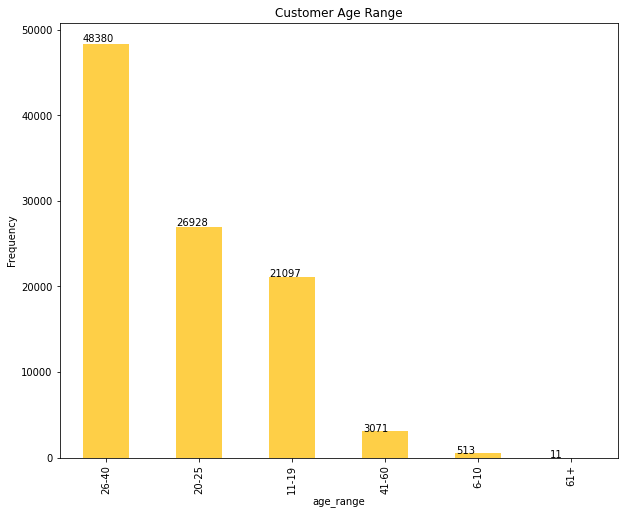

In [ ]:
                                    ax = customer["age_range"].value_counts().plot(kind='bar',
                                    figsize=(10,8),
                                    title="Customer Age Range",
                                    color = "#fecf47")
ax.set_xlabel("age_range")
ax.set_ylabel("Frequency")

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
plt.show()

In [ ]:
df_age= customer.groupby('customer_id')[['age_category']].first().reset_index()
df_age

,customer_id,age_category
0,1,1
1,2,2
2,3,2
3,4,2
4,5,2
...,...,...
99995,99996,0
99996,99997,0
99997,99998,4
99998,99999,0


##**Customer Device** 

In [ ]:
customer['Device_type'] = customer['device_version'].apply(lambda x: x.split(';')[0]).apply(lambda x: x.split(' ')[0])

In [ ]:
customer

,customer_id,first_name,last_name,username,email,gender,birthdate,device_type,device_id,device_version,home_location_lat,home_location_long,home_location,home_country,first_join_date,Age,age_range,age_category,Device_type
0,2870,Lala,Maryati,671a0865-ac4e-4dc4-9c4f-c286a1176f7e,671a0865_ac4e_4dc4_9c4f_c286a1176f7e@startupca...,F,1996-06-14,iOS,c9c0de76-0a6c-4ac2-843f-65264ab9fe63,iPhone; CPU iPhone OS 14_2_1 like Mac OS X,-1.043345,101.360523,Sumatera Barat,Indonesia,2019-07-21,26,26-40,2,iPhone
1,8193,Maimunah,Laksmiwati,83be2ba7-8133-48a4-bbcb-b46a2762473f,83be2ba7_8133_48a4_bbcb_b46a2762473f@zakyfound...,F,1993-08-16,Android,fb331c3d-f42e-40fe-afe2-b4b73a8a6e25,Android 2.2.1,-6.212489,106.818850,Jakarta Raya,Indonesia,2017-07-16,29,26-40,2,Android
2,7279,Bakiman,Simanjuntak,3250e5a3-1d23-4675-a647-3281879d42be,3250e5a3_1d23_4675_a647_3281879d42be@startupca...,M,1989-01-23,iOS,d13dde0a-6ae1-43c3-83a7-11bbb922730b,iPad; CPU iPad OS 4_2_1 like Mac OS X,-8.631607,116.428436,Nusa Tenggara Barat,Indonesia,2020-08-23,33,26-40,2,iPad
3,88813,Cahyadi,Maheswara,df797edf-b465-4a80-973b-9fbb612260c2,df797edf_b465_4a80_973b_9fbb612260c2@zakyfound...,M,1991-01-05,iOS,f4c18515-c5be-419f-8142-f037be47c9cd,iPad; CPU iPad OS 14_2 like Mac OS X,1.299332,115.774934,Kalimantan Timur,Indonesia,2021-10-03,31,26-40,2,iPad
4,82542,Irnanto,Wijaya,36ab08e1-03de-42a8-9e3b-59528c798824,36ab08e1_03de_42a8_9e3b_59528c798824@startupca...,M,2000-07-15,iOS,e46e4c36-4630-4736-8fcf-663db29ca3b0,iPhone; CPU iPhone OS 10_3_3 like Mac OS X,-2.980807,114.924675,Kalimantan Selatan,Indonesia,2021-04-11,22,20-25,1,iPhone
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,34743,Manah,Mustofa,bf989ab1-d7eb-4ad5-b4bc-29e3cf69b35c,bf989ab1_d7eb_4ad5_b4bc_29e3cf69b35c@startupca...,M,2000-11-17,Android,fa1914a5-0c12-4393-8d6c-af4e4a4de6aa,Android 4.3.1,-5.203523,105.635530,Lampung,Indonesia,2020-10-17,22,20-25,1,Android
99996,72065,Danu,Pradana,4af2b3d5-c573-4032-b29c-24782745a2f6,4af2b3d5_c573_4032_b29c_24782745a2f6@startupca...,M,1998-03-30,Android,d8234d67-6954-4e05-8293-d37ef25bfd7e,Android 8.0.0,4.474702,95.904876,Aceh,Indonesia,2017-11-25,24,20-25,1,Android
99997,32818,Talia,Aryani,af0edbfa-f354-4765-813b-b9f151022555,af0edbfa_f354_4765_813b_b9f151022555@startupca...,F,1993-01-12,Android,3c586f64-aab7-4dd6-be94-5d47c6361081,Android 11,-3.330376,127.028348,Maluku,Indonesia,2018-09-01,29,26-40,2,Android
99998,75597,Ajimat,Mansur,35cd82f3-6b86-42a2-bb15-933770d7f250,35cd82f3_6b86_42a2_bb15_933770d7f250@startupca...,M,2000-09-13,Android,3b209c58-d305-4b46-9363-b90a3914f008,Android 7.1,-2.173114,101.495913,Jambi,Indonesia,2020-05-31,22,20-25,1,Android


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


Text(0.5, 1.0, 'Device Type of Customer')

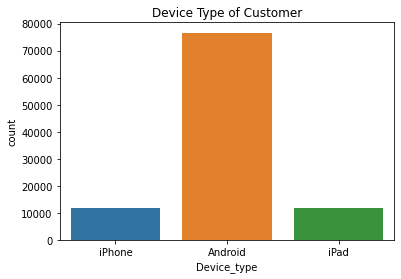

In [ ]:
sns.countplot('Device_type', data=customer)
plt.title('Device Type of Customer')

In [ ]:
df_device= customer.groupby('customer_id')[['Device_type']].first().reset_index()
df_device_nominal = pd.get_dummies(df_device)
df_device_nominal

,customer_id,Device_type_Android,Device_type_iPad,Device_type_iPhone
0,1,0,0,1
1,2,1,0,0
2,3,1,0,0
3,4,1,0,0
4,5,0,1,0
...,...,...,...,...
99995,99996,1,0,0
99996,99997,0,0,1
99997,99998,1,0,0
99998,99999,1,0,0


In [ ]:
df_device_nominal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column               Non-Null Count   Dtype
---  ------               --------------   -----
 0   customer_id          100000 non-null  int64
 1   Device_type_Android  100000 non-null  uint8
 2   Device_type_iPad     100000 non-null  uint8
 3   Device_type_iPhone   100000 non-null  uint8
dtypes: int64(1), uint8(3)
memory usage: 1.0 MB


## Gender

In [ ]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 19 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   customer_id         100000 non-null  int64         
 1   first_name          100000 non-null  object        
 2   last_name           100000 non-null  object        
 3   username            100000 non-null  object        
 4   email               100000 non-null  object        
 5   gender              100000 non-null  object        
 6   birthdate           100000 non-null  datetime64[ns]
 7   device_type         100000 non-null  object        
 8   device_id           100000 non-null  object        
 9   device_version      100000 non-null  object        
 10  home_location_lat   100000 non-null  float64       
 11  home_location_long  100000 non-null  float64       
 12  home_location       100000 non-null  object        
 13  home_country        100000 non

In [ ]:
df_gender= customer.groupby('customer_id')[['gender']].first().reset_index()
df_gender_nominal = pd.get_dummies(df_gender)
df_gender_nominal

,customer_id,gender_F,gender_M
0,1,1,0
1,2,1,0
2,3,0,1
3,4,1,0
4,5,0,1
...,...,...,...
99995,99996,0,1
99996,99997,0,1
99997,99998,1,0
99998,99999,0,1


In [ ]:
df_gender['gender'].value_counts()

F    64230
M    35770
Name: gender, dtype: int64

In [ ]:
df_gender_nominal.head()

,customer_id,gender_F,gender_M
0,1,1,0
1,2,1,0
2,3,0,1
3,4,1,0
4,5,0,1


## Membership Period

In [ ]:
# Making Function to calculate first_join_date into membership_period in year
def calculate_membership(first_join_date):
    today = date.today()
    periode = ((today.year - first_join_date.year)*12) + (today.month - first_join_date.month)
    return periode

In [ ]:
customer['membership_in_months'] = customer.first_join_date.apply(calculate_membership)

In [ ]:
# Making table membership_in_months
df_member = customer.groupby('customer_id')[['membership_in_months']].max().reset_index()

In [ ]:
df_member.head()

,customer_id,membership_in_months
0,1,72
1,2,11
2,3,51
3,4,20
4,5,11


In [ ]:
df_member['membership_in_months'].unique()

array([72, 11, 51, 20,  8, 21, 17, 45,  7, 67, 38,  6, 48, 44, 14, 12, 15,
       54, 28, 35, 24, 46, 27, 40, 13, 30, 64, 18, 32, 50, 22, 10, 41, 29,
       73, 23, 74,  4, 16, 34, 63, 53, 42, 60, 71, 70, 31, 43, 49, 65, 58,
       68, 57, 25, 33, 75, 62, 39, 37, 47, 26,  5, 66,  9, 55, 52, 36, 69,
       59, 76, 19, 56, 61, 77])

Membership Category:
- New Member = 1-24 months
- Middle Member = 25-48 months
- Old Member = 49+ months

In [ ]:
# Making Categories
bins = [1, 25, 49, 110]
labels = ['1-24','25-48','49+']
df_member['membership_range'] = pd.cut(df_member.membership_in_months, bins, labels = labels, include_lowest= True)

In [ ]:
df_member.head(10)

,customer_id,membership_in_months,membership_range
0,1,72,49+
1,2,11,1-24
2,3,51,49+
3,4,20,1-24
4,5,11,1-24
5,6,8,1-24
6,7,11,1-24
7,8,21,1-24
8,9,17,1-24
9,10,45,25-48


In [ ]:
# Making Label Encoder
LE = LabelEncoder()
df_member['membership_label'] = LE.fit_transform(df_member['membership_range'])

In [ ]:
df_member.head()

,customer_id,membership_in_months,membership_range,membership_label
0,1,72,49+,2
1,2,11,1-24,0
2,3,51,49+,2
3,4,20,1-24,0
4,5,11,1-24,0


In [ ]:
df_member['membership_label'].value_counts()

0    41693
1    31806
2    26501
Name: membership_label, dtype: int64

In [ ]:
df_member.loc[df_member['membership_label']== 0]

,customer_id,membership_in_months,membership_range,membership_label
1,2,11,1-24,0
3,4,20,1-24,0
4,5,11,1-24,0
5,6,8,1-24,0
6,7,11,1-24,0
...,...,...,...,...
99989,99990,14,1-24,0
99990,99991,21,1-24,0
99993,99994,21,1-24,0
99995,99996,7,1-24,0


In [ ]:
df_member.loc[df_member['membership_label']== 1]

,customer_id,membership_in_months,membership_range,membership_label
9,10,45,25-48,1
12,13,45,25-48,1
14,15,38,25-48,1
16,17,48,25-48,1
17,18,44,25-48,1
...,...,...,...,...
99987,99988,41,25-48,1
99991,99992,29,25-48,1
99992,99993,30,25-48,1
99994,99995,27,25-48,1


In [ ]:
df_member.loc[df_member['membership_label']== 2]

,customer_id,membership_in_months,membership_range,membership_label
0,1,72,49+,2
2,3,51,49+,2
13,14,67,49+,2
21,22,54,49+,2
22,23,67,49+,2
...,...,...,...,...
99983,99984,63,49+,2
99984,99985,50,49+,2
99986,99987,50,49+,2
99997,99998,52,49+,2


Membership Category Label Encoder:
- New Member = 1-24 months
  - Label Encoder = 0
- Middle Member = 25-48 months
  - Label Encoder = 1
- Old Member = 49+ months
  - Label Encoder = 2

In [ ]:
df_member.drop('membership_in_months', inplace=True, axis=1)

In [ ]:
df_member.drop('membership_range', inplace=True, axis=1)

In [ ]:
df_member.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 2 columns):
 #   Column            Non-Null Count   Dtype
---  ------            --------------   -----
 0   customer_id       100000 non-null  int64
 1   membership_label  100000 non-null  int64
dtypes: int64(2)
memory usage: 1.5 MB


## **Biaya Ongkir** 

In [ ]:
transaksi['shipment_fee'].isna().sum()

0

In [ ]:
transaksi['shipment_fee'].unique()

array([10000,     0,  5000, 50000, 25000, 15000])

In [ ]:
transaksi['payment_status'].unique()

array(['Success', 'Failed'], dtype=object)

In [ ]:
df_sukses=transaksi[transaksi['payment_status'] == 'Success']

- free ongkir = 0
- bayar onkir = 1

In [ ]:
def get_dimensions (df_sukses):
    if df_sukses['shipment_fee'] > 10:
        return 1
    elif df_sukses['shipment_fee'] <= 10:
        return 0
df_sukses['Biaya_Ongkir']=df_sukses.apply(get_dimensions,axis=1)
df_sukses.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,created_at,customer_id,booking_id,session_id,product_metadata,payment_method,payment_status,promo_amount,promo_code,shipment_fee,shipment_date_limit,shipment_location_lat,shipment_location_long,total_amount,Biaya_Ongkir
0,2018-07-29 15:22:01.458193+00:00,5868,186e2bee-0637-4710-8981-50c2d737bc42,3abaa6ce-e320-4e51-9469-d9f3fa328e86,"[{'product_id': 54728, 'quantity': 1, 'item_pr...",Debit Card,Success,1415,WEEKENDSERU,10000,2018-08-03 05:07:24.812676+00:00,-8.227893,111.969107,199832,1
1,2018-07-30 12:40:22.365620+00:00,4774,caadb57b-e808-4f94-9e96-8a7d4c9898db,2ee5ead1-f13e-4759-92df-7ff48475e970,"[{'product_id': 16193, 'quantity': 1, 'item_pr...",Credit Card,Success,0,NaN,10000,2018-08-03 01:29:03.415705+00:00,3.013470,107.802514,155526,1
2,2018-09-15 11:51:17.365620+00:00,4774,6000fffb-9c1a-4f4a-9296-bc8f6b622b50,93325fb6-eb00-4268-bb0e-6471795a0ad0,"[{'product_id': 53686, 'quantity': 4, 'item_pr...",OVO,Success,0,NaN,10000,2018-09-18 08:41:49.422380+00:00,-2.579428,115.743885,550696,1
3,2018-11-01 11:23:48.365620+00:00,4774,f5e530a7-4350-4cd1-a3bc-525b5037bcab,bcad5a61-1b67-448d-8ff4-781d67bc56e4,"[{'product_id': 20228, 'quantity': 1, 'item_pr...",Credit Card,Success,0,NaN,0,2018-11-05 17:42:27.954235+00:00,-3.602334,120.363824,271012,0
4,2018-12-18 11:20:30.365620+00:00,4774,0efc0594-dbbf-4f9a-b0b0-a488cfddf8a2,df1042ab-13e6-4072-b9d2-64a81974c51a,"[{'product_id': 55220, 'quantity': 1, 'item_pr...",Credit Card,Success,0,NaN,0,2018-12-23 17:24:07.361785+00:00,-3.602334,120.363824,198753,0


In [ ]:
df_sukses[['Biaya_Ongkir']].value_counts()

Biaya_Ongkir
1               604921
0               211043
dtype: int64

In [ ]:
df_shipment= df_sukses.groupby('customer_id')[['Biaya_Ongkir']].mean().reset_index()
df_shipment = df_shipment.rename(columns = {'Biaya_Ongkir' : 'persentase_ongkir'})
df_shipment.head()

,customer_id,persentase_ongkir
0,3,0.714286
1,8,0.714286
2,9,0.666667
3,11,1.000000
4,15,1.000000


In [ ]:
df_shipment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50242 entries, 0 to 50241
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_id        50242 non-null  int64  
 1   persentase_ongkir  50242 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 785.2 KB


In [ ]:
df_sukses['Biaya_Ongkir'].value_counts()

1    604921
0    211043
Name: Biaya_Ongkir, dtype: int64

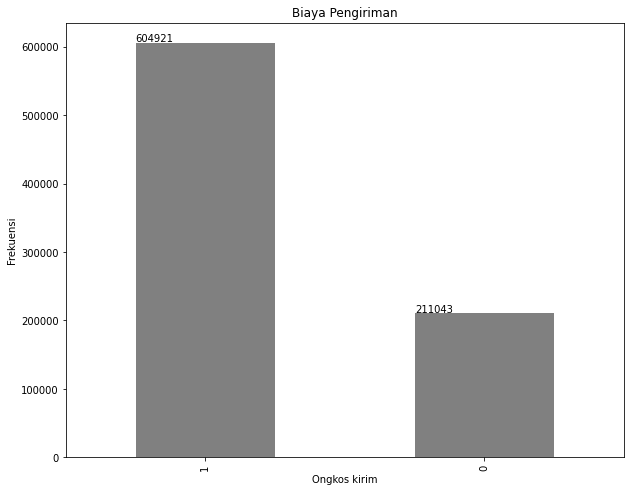

In [ ]:
ax = df_sukses['Biaya_Ongkir'].value_counts().plot(kind='bar',
                                    figsize=(10,8),
                                    title="Biaya Pengiriman",
                                    color = "#808080")
ax.set_xlabel("Ongkos kirim")
ax.set_ylabel("Frekuensi")

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
plt.show()

## Frekuensi order

In [ ]:
#Buat tabel mengenai total order tiap pelanggan
total_order = transaksi.groupby('customer_id')[['booking_id']].count().sort_values(by = 'booking_id', ascending = False).reset_index()
total_order = total_order.rename(columns = {'booking_id' : 'frekuensi_order'})
total_order.head()

,customer_id,frekuensi_order
0,43202,550
1,29496,505
2,82237,503
3,10167,473
4,69740,458


## Payment method

In [ ]:
df_payment= transaksi.groupby('customer_id')[['payment_method']].first().reset_index()
df_payment.head()

,customer_id,payment_method
0,3,Credit Card
1,8,Credit Card
2,9,Gopay
3,11,OVO
4,15,LinkAja


In [ ]:
def encode_and_bind(original_dataframe, feature_to_encode):
    dummies = pd.get_dummies(original_dataframe[[feature_to_encode]])
    res = pd.concat([original_dataframe, dummies], axis=1)
    return(res)

In [ ]:
df_payment = encode_and_bind(df_payment, 'payment_method')

In [ ]:
df_payment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50705 entries, 0 to 50704
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   customer_id                 50705 non-null  int64 
 1   payment_method              50705 non-null  object
 2   payment_method_Credit Card  50705 non-null  uint8 
 3   payment_method_Debit Card   50705 non-null  uint8 
 4   payment_method_Gopay        50705 non-null  uint8 
 5   payment_method_LinkAja      50705 non-null  uint8 
 6   payment_method_OVO          50705 non-null  uint8 
dtypes: int64(1), object(1), uint8(5)
memory usage: 1.0+ MB


In [ ]:
df_payment.drop('payment_method', inplace=True, axis=1)

In [ ]:
df_payment.head()

,customer_id,payment_method_Credit Card,payment_method_Debit Card,payment_method_Gopay,payment_method_LinkAja,payment_method_OVO
0,3,1,0,0,0,0
1,8,1,0,0,0,0
2,9,0,0,1,0,0
3,11,0,0,0,0,1
4,15,0,0,0,1,0


## Promo Amount

In [ ]:
# Besar Nominal Promo per Customer
jumlah_promo = transaksi.groupby('customer_id')[['promo_amount']].sum().reset_index()
jumlah_promo.rename(columns = {'promo_amount':'jumlah_promo'}, inplace=True)
jumlah_promo

,customer_id,jumlah_promo
0,3,131082
1,8,7699
2,9,0
3,11,9492
4,15,16362
...,...,...
50700,99992,12442
50701,99995,63674
50702,99997,0
50703,99998,30325


## Home Location

In [ ]:
df_city= customer.groupby('customer_id')[['home_location']].first().reset_index()

In [ ]:
nominal_city = pd.get_dummies(df_city)
nominal_city

,customer_id,home_location_Aceh,home_location_Bali,home_location_Bangka Belitung,home_location_Banten,home_location_Bengkulu,home_location_Gorontalo,home_location_Jakarta Raya,home_location_Jambi,home_location_Jawa Barat,...,home_location_Riau,home_location_Sulawesi Barat,home_location_Sulawesi Selatan,home_location_Sulawesi Tengah,home_location_Sulawesi Tenggara,home_location_Sulawesi Utara,home_location_Sumatera Barat,home_location_Sumatera Selatan,home_location_Sumatera Utara,home_location_Yogyakarta
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,3,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,99996,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
99996,99997,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
99997,99998,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
99998,99999,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Total Amount

In [ ]:
df_monetary= transaksi.groupby('customer_id')[['total_amount']].sum().reset_index()
df_monetary.head()

,customer_id,total_amount
0,3,21265889
1,8,3898561
2,9,2638665
3,11,197533
4,15,2134870


## Waktu Kemas

In [ ]:
transaksi['kemas'] = transaksi['shipment_date_limit']-transaksi['created_at']

In [ ]:
transaksi['kemas']= transaksi.kemas.dt.days


In [ ]:
transaksi.head()

,created_at,customer_id,booking_id,session_id,product_metadata,payment_method,payment_status,promo_amount,promo_code,shipment_fee,shipment_date_limit,shipment_location_lat,shipment_location_long,total_amount,kemas
0,2018-07-29 15:22:01.458193+00:00,5868,186e2bee-0637-4710-8981-50c2d737bc42,3abaa6ce-e320-4e51-9469-d9f3fa328e86,"[{'product_id': 54728, 'quantity': 1, 'item_pr...",Debit Card,Success,1415,WEEKENDSERU,10000,2018-08-03 05:07:24.812676+00:00,-8.227893,111.969107,199832,4
1,2018-07-30 12:40:22.365620+00:00,4774,caadb57b-e808-4f94-9e96-8a7d4c9898db,2ee5ead1-f13e-4759-92df-7ff48475e970,"[{'product_id': 16193, 'quantity': 1, 'item_pr...",Credit Card,Success,0,NaN,10000,2018-08-03 01:29:03.415705+00:00,3.013470,107.802514,155526,3
2,2018-09-15 11:51:17.365620+00:00,4774,6000fffb-9c1a-4f4a-9296-bc8f6b622b50,93325fb6-eb00-4268-bb0e-6471795a0ad0,"[{'product_id': 53686, 'quantity': 4, 'item_pr...",OVO,Success,0,NaN,10000,2018-09-18 08:41:49.422380+00:00,-2.579428,115.743885,550696,2
3,2018-11-01 11:23:48.365620+00:00,4774,f5e530a7-4350-4cd1-a3bc-525b5037bcab,bcad5a61-1b67-448d-8ff4-781d67bc56e4,"[{'product_id': 20228, 'quantity': 1, 'item_pr...",Credit Card,Success,0,NaN,0,2018-11-05 17:42:27.954235+00:00,-3.602334,120.363824,271012,4
4,2018-12-18 11:20:30.365620+00:00,4774,0efc0594-dbbf-4f9a-b0b0-a488cfddf8a2,df1042ab-13e6-4072-b9d2-64a81974c51a,"[{'product_id': 55220, 'quantity': 1, 'item_pr...",Credit Card,Success,0,NaN,0,2018-12-23 17:24:07.361785+00:00,-3.602334,120.363824,198753,5


In [ ]:
df_kemas= transaksi.groupby('customer_id')[['kemas']].mean().reset_index()
df_kemas

,customer_id,kemas
0,3,3.058824
1,8,2.857143
2,9,2.833333
3,11,1.000000
4,15,4.000000
...,...,...
50700,99992,2.500000
50701,99995,2.950000
50702,99997,4.000000
50703,99998,2.375000


In [ ]:
df_kemas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50705 entries, 0 to 50704
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   customer_id  50705 non-null  int64  
 1   kemas        50705 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 792.4 KB


## Event name

In [ ]:
click_s= click_stream[['session_id','event_name','traffic_source']]

In [ ]:
df_event = pd.get_dummies(click_s['event_name'], drop_first = False)
df_event.columns= df_event.columns.str.lower()
df_event.head()

,add_promo,add_to_cart,booking,click,homepage,item_detail,promo_page,scroll,search
0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,1,0
2,0,0,0,0,1,0,0,0,0
3,0,1,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0


In [ ]:
click_stream_concat= pd.concat([df_event,click_s],sort=False,axis=1)

In [ ]:
click_stream_concat.head()

,add_promo,add_to_cart,booking,click,homepage,item_detail,promo_page,scroll,search,session_id,event_name,traffic_source
0,0,0,0,0,1,0,0,0,0,fb0abf9e-fd1a-44dd-b5c0-2834d5a4b81c,HOMEPAGE,MOBILE
1,0,0,0,0,0,0,0,1,0,fb0abf9e-fd1a-44dd-b5c0-2834d5a4b81c,SCROLL,MOBILE
2,0,0,0,0,1,0,0,0,0,7d440441-e67a-4d36-b324-80ffd636d166,HOMEPAGE,MOBILE
3,0,1,0,0,0,0,0,0,0,7d440441-e67a-4d36-b324-80ffd636d166,ADD_TO_CART,MOBILE
4,0,0,1,0,0,0,0,0,0,7d440441-e67a-4d36-b324-80ffd636d166,BOOKING,MOBILE


In [ ]:
click_stream_concat.drop(columns=['event_name','traffic_source'],inplace=True)

In [ ]:
click_stream_concat.head()

,add_promo,add_to_cart,booking,click,homepage,item_detail,promo_page,scroll,search,session_id
0,0,0,0,0,1,0,0,0,0,fb0abf9e-fd1a-44dd-b5c0-2834d5a4b81c
1,0,0,0,0,0,0,0,1,0,fb0abf9e-fd1a-44dd-b5c0-2834d5a4b81c
2,0,0,0,0,1,0,0,0,0,7d440441-e67a-4d36-b324-80ffd636d166
3,0,1,0,0,0,0,0,0,0,7d440441-e67a-4d36-b324-80ffd636d166
4,0,0,1,0,0,0,0,0,0,7d440441-e67a-4d36-b324-80ffd636d166


In [ ]:
df_cs_transaksi = pd.merge(click_stream_concat, transaksi, on='session_id', how='inner')
df_cs_transaksi.head()

,add_promo,add_to_cart,booking,click,homepage,item_detail,promo_page,scroll,search,session_id,...,payment_method,payment_status,promo_amount,promo_code,shipment_fee,shipment_date_limit,shipment_location_lat,shipment_location_long,total_amount,kemas
0,0,0,0,0,1,0,0,0,0,7d440441-e67a-4d36-b324-80ffd636d166,...,Gopay,Success,0,NaN,0,2019-09-05 20:40:27.492774+00:00,3.869205,108.126753,1254116,4
1,0,1,0,0,0,0,0,0,0,7d440441-e67a-4d36-b324-80ffd636d166,...,Gopay,Success,0,NaN,0,2019-09-05 20:40:27.492774+00:00,3.869205,108.126753,1254116,4
2,0,0,1,0,0,0,0,0,0,7d440441-e67a-4d36-b324-80ffd636d166,...,Gopay,Success,0,NaN,0,2019-09-05 20:40:27.492774+00:00,3.869205,108.126753,1254116,4
3,0,0,0,0,0,0,0,0,1,7d440441-e67a-4d36-b324-80ffd636d166,...,Gopay,Success,0,NaN,0,2019-09-05 20:40:27.492774+00:00,3.869205,108.126753,1254116,4
4,0,0,0,0,1,0,0,0,0,7d440441-e67a-4d36-b324-80ffd636d166,...,Gopay,Success,0,NaN,0,2019-09-05 20:40:27.492774+00:00,3.869205,108.126753,1254116,4


In [ ]:
df_cs_transaksi.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12463004 entries, 0 to 12463003
Data columns (total 24 columns):
 #   Column                  Dtype              
---  ------                  -----              
 0   add_promo               uint8              
 1   add_to_cart             uint8              
 2   booking                 uint8              
 3   click                   uint8              
 4   homepage                uint8              
 5   item_detail             uint8              
 6   promo_page              uint8              
 7   scroll                  uint8              
 8   search                  uint8              
 9   session_id              object             
 10  created_at              datetime64[ns, UTC]
 11  customer_id             int64              
 12  booking_id              object             
 13  product_metadata        object             
 14  payment_method          object             
 15  payment_status          object             
 16

In [ ]:
df_cs = df_cs_transaksi[['session_id','customer_id','search', 'add_promo', 'add_to_cart','booking','click','homepage','item_detail','promo_page','scroll']]

In [ ]:
df_cs.head()

,session_id,customer_id,search,add_promo,add_to_cart,booking,click,homepage,item_detail,promo_page,scroll
0,7d440441-e67a-4d36-b324-80ffd636d166,18770,0,0,0,0,0,1,0,0,0
1,7d440441-e67a-4d36-b324-80ffd636d166,18770,0,0,1,0,0,0,0,0,0
2,7d440441-e67a-4d36-b324-80ffd636d166,18770,0,0,0,1,0,0,0,0,0
3,7d440441-e67a-4d36-b324-80ffd636d166,18770,1,0,0,0,0,0,0,0,0
4,7d440441-e67a-4d36-b324-80ffd636d166,18770,0,0,0,0,0,1,0,0,0


In [ ]:
df_clickstream = df_cs.drop(columns=['session_id']).groupby('customer_id'
                                  ,as_index=False).agg({
                                                       'add_promo': lambda x: sum(x),
                                                       'add_to_cart': lambda x: sum(x),
                                                       'booking': lambda x: sum(x),
                                                       'click': lambda x: sum(x),
                                                       'homepage': lambda x: sum(x),
                                                       'item_detail': lambda x: sum(x),
                                                       'promo_page': lambda x: sum(x),
                                                       'scroll': lambda x: sum(x),
                                                       'search': lambda x: sum(x),
                                                      },
                                                      )

In [ ]:
df_clickstream.head()

,customer_id,add_promo,add_to_cart,booking,click,homepage,item_detail,promo_page,scroll,search
0,3,27,156,51,118,109,56,42,72,51
1,8,1,14,7,25,93,32,5,16,9
2,9,0,16,6,11,8,5,3,6,4
3,11,1,4,1,1,3,2,2,0,0
4,15,4,21,5,9,9,3,1,2,3


In [ ]:
df_clickstream.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50704 entries, 0 to 50703
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   customer_id  50704 non-null  int64
 1   add_promo    50704 non-null  int64
 2   add_to_cart  50704 non-null  int64
 3   booking      50704 non-null  int64
 4   click        50704 non-null  int64
 5   homepage     50704 non-null  int64
 6   item_detail  50704 non-null  int64
 7   promo_page   50704 non-null  int64
 8   scroll       50704 non-null  int64
 9   search       50704 non-null  int64
dtypes: int64(10)
memory usage: 3.9 MB


# Definisi Churn

## Transaksi pertama

In [ ]:
transaksi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 852584 entries, 0 to 852583
Data columns (total 15 columns):
 #   Column                  Non-Null Count   Dtype              
---  ------                  --------------   -----              
 0   created_at              852584 non-null  datetime64[ns, UTC]
 1   customer_id             852584 non-null  int64              
 2   booking_id              852584 non-null  object             
 3   session_id              852584 non-null  object             
 4   product_metadata        852584 non-null  object             
 5   payment_method          852584 non-null  object             
 6   payment_status          852584 non-null  object             
 7   promo_amount            852584 non-null  int64              
 8   promo_code              326536 non-null  object             
 9   shipment_fee            852584 non-null  int64              
 10  shipment_date_limit     852584 non-null  datetime64[ns, UTC]
 11  shipment_location_lat   85

In [ ]:
def convert_date(dataframe, colname):
  
  dataframe[colname] = pd.to_datetime(dataframe[colname])

  return dataframe

In [ ]:
transaksi = convert_date(transaksi, "created_at")

In [ ]:
#Buat tabel mengenai total order tiap pelanggan
pertama_order = transaksi.groupby('customer_id')[['created_at']].min().reset_index()
pertama_order = pertama_order.rename(columns = {'created_at' : 'first_transaksi'})


In [ ]:
df_first = pertama_order[pertama_order['first_transaksi'] >= '2022-01-01']
df_first.head()

,customer_id,first_transaksi
3,11,2022-03-07 14:29:13.759159+00:00
17,45,2022-01-22 12:37:10.564007+00:00
30,79,2022-01-19 19:15:30.941035+00:00
43,102,2022-07-17 14:24:58.024341+00:00
50,114,2022-07-16 16:36:56.986041+00:00


## Cut_off

In [ ]:
print("Latest date in dataset: ", transaksi['created_at'].max())

Latest date in dataset:  2022-07-31 23:59:45.821469+00:00


In [ ]:
import datetime as dt

In [ ]:
present_day = transaksi['created_at'].max() - dt.timedelta(days=90)
present_day

Timestamp('2022-05-02 23:59:45.821469+0000', tz='UTC')

In [ ]:
transaksi['cut_off']=present_day

In [ ]:
cutoff = transaksi.groupby('customer_id')[['cut_off']].min().reset_index()

In [ ]:
transaksi[['cut_off']]

,cut_off
0,2022-05-02 23:59:45.821469+00:00
1,2022-05-02 23:59:45.821469+00:00
2,2022-05-02 23:59:45.821469+00:00
3,2022-05-02 23:59:45.821469+00:00
4,2022-05-02 23:59:45.821469+00:00
...,...
852579,2022-05-02 23:59:45.821469+00:00
852580,2022-05-02 23:59:45.821469+00:00
852581,2022-05-02 23:59:45.821469+00:00
852582,2022-05-02 23:59:45.821469+00:00


In [ ]:
cutoff

,customer_id,cut_off
0,3,2022-05-02 23:59:45.821469+00:00
1,8,2022-05-02 23:59:45.821469+00:00
2,9,2022-05-02 23:59:45.821469+00:00
3,11,2022-05-02 23:59:45.821469+00:00
4,15,2022-05-02 23:59:45.821469+00:00
...,...,...
50700,99992,2022-05-02 23:59:45.821469+00:00
50701,99995,2022-05-02 23:59:45.821469+00:00
50702,99997,2022-05-02 23:59:45.821469+00:00
50703,99998,2022-05-02 23:59:45.821469+00:00


## Last order

In [ ]:
#Buat tabel mengenai total order tiap pelanggan
last_order = transaksi.groupby('customer_id')[['created_at']].max().reset_index()
last_order = last_order.rename(columns = {'created_at' : 'last_transaksi'})

In [ ]:
last_order

,customer_id,last_transaksi
0,3,2022-06-26 15:41:52.844494+00:00
1,8,2022-05-15 22:46:22.656991+00:00
2,9,2022-05-28 08:44:32.421034+00:00
3,11,2022-03-07 14:29:13.759159+00:00
4,15,2022-01-05 06:07:58.105040+00:00
...,...,...
50700,99992,2022-05-25 09:32:49.873510+00:00
50701,99995,2022-07-29 03:54:17.810263+00:00
50702,99997,2020-04-25 18:38:16.825127+00:00
50703,99998,2022-01-25 00:54:09.703960+00:00


In [ ]:
## gabung dataet
df_churn = pd.merge(df_first, cutoff, on='customer_id', how='inner')
df_churn = pd.merge(df_churn, last_order, on='customer_id', how='inner')
df_churn.head()

,customer_id,first_transaksi,cut_off,last_transaksi
0,11,2022-03-07 14:29:13.759159+00:00,2022-05-02 23:59:45.821469+00:00,2022-03-07 14:29:13.759159+00:00
1,45,2022-01-22 12:37:10.564007+00:00,2022-05-02 23:59:45.821469+00:00,2022-07-13 09:23:46.564007+00:00
2,79,2022-01-19 19:15:30.941035+00:00,2022-05-02 23:59:45.821469+00:00,2022-04-25 21:30:59.941035+00:00
3,102,2022-07-17 14:24:58.024341+00:00,2022-05-02 23:59:45.821469+00:00,2022-07-27 20:21:49.024341+00:00
4,114,2022-07-16 16:36:56.986041+00:00,2022-05-02 23:59:45.821469+00:00,2022-07-16 16:36:56.986041+00:00


## Label churn

In [ ]:
df=df_churn

In [ ]:
def get_dimensions (df):
    if df['first_transaksi'] < df['cut_off'] < df['last_transaksi']:
        return 'not_churn'
    elif  df['cut_off'] > df['last_transaksi']:
        return 'churn'
    elif  df['first_transaksi'] >= df['cut_off']:
        return 'new_user'
df['churn']=df.apply(get_dimensions,axis=1)
df.head()

,customer_id,first_transaksi,cut_off,last_transaksi,churn
0,11,2022-03-07 14:29:13.759159+00:00,2022-05-02 23:59:45.821469+00:00,2022-03-07 14:29:13.759159+00:00,churn
1,45,2022-01-22 12:37:10.564007+00:00,2022-05-02 23:59:45.821469+00:00,2022-07-13 09:23:46.564007+00:00,not_churn
2,79,2022-01-19 19:15:30.941035+00:00,2022-05-02 23:59:45.821469+00:00,2022-04-25 21:30:59.941035+00:00,churn
3,102,2022-07-17 14:24:58.024341+00:00,2022-05-02 23:59:45.821469+00:00,2022-07-27 20:21:49.024341+00:00,new_user
4,114,2022-07-16 16:36:56.986041+00:00,2022-05-02 23:59:45.821469+00:00,2022-07-16 16:36:56.986041+00:00,new_user


In [ ]:
df[['churn']].value_counts()

churn    
not_churn    2604
new_user     2101
churn        1211
dtype: int64

In [ ]:
df_churned=df[df['churn'] == 'churn']
df_churned.head()

,customer_id,first_transaksi,cut_off,last_transaksi,churn
0,11,2022-03-07 14:29:13.759159+00:00,2022-05-02 23:59:45.821469+00:00,2022-03-07 14:29:13.759159+00:00,churn
2,79,2022-01-19 19:15:30.941035+00:00,2022-05-02 23:59:45.821469+00:00,2022-04-25 21:30:59.941035+00:00,churn
8,131,2022-01-02 18:07:37.905190+00:00,2022-05-02 23:59:45.821469+00:00,2022-01-02 18:07:37.905190+00:00,churn
14,203,2022-01-08 04:02:12.291795+00:00,2022-05-02 23:59:45.821469+00:00,2022-04-20 04:47:58.291795+00:00,churn
15,207,2022-01-17 12:01:00.660113+00:00,2022-05-02 23:59:45.821469+00:00,2022-01-17 12:01:00.660113+00:00,churn


In [ ]:
df_notchurn=df[df['churn'] == 'not_churn']
df_notchurn.head()

,customer_id,first_transaksi,cut_off,last_transaksi,churn
1,45,2022-01-22 12:37:10.564007+00:00,2022-05-02 23:59:45.821469+00:00,2022-07-13 09:23:46.564007+00:00,not_churn
7,121,2022-03-26 04:27:22.711463+00:00,2022-05-02 23:59:45.821469+00:00,2022-07-30 07:01:00.711463+00:00,not_churn
10,153,2022-02-07 05:10:22.812530+00:00,2022-05-02 23:59:45.821469+00:00,2022-05-06 13:43:16.812530+00:00,not_churn
13,198,2022-01-09 06:28:48.274756+00:00,2022-05-02 23:59:45.821469+00:00,2022-07-20 13:09:12.274756+00:00,not_churn
16,245,2022-04-17 05:57:11.588991+00:00,2022-05-02 23:59:45.821469+00:00,2022-06-08 15:51:35.588991+00:00,not_churn


In [ ]:
df_newuser=df[df['churn'] == 'new_user']
df_newuser

,customer_id,first_transaksi,cut_off,last_transaksi,churn
3,102,2022-07-17 14:24:58.024341+00:00,2022-05-02 23:59:45.821469+00:00,2022-07-27 20:21:49.024341+00:00,new_user
4,114,2022-07-16 16:36:56.986041+00:00,2022-05-02 23:59:45.821469+00:00,2022-07-16 16:36:56.986041+00:00,new_user
5,115,2022-06-06 03:58:54.723399+00:00,2022-05-02 23:59:45.821469+00:00,2022-07-12 20:20:40.723399+00:00,new_user
6,120,2022-06-07 08:52:05.141569+00:00,2022-05-02 23:59:45.821469+00:00,2022-06-07 08:52:05.141569+00:00,new_user
9,139,2022-06-27 22:56:31.278960+00:00,2022-05-02 23:59:45.821469+00:00,2022-07-31 05:59:15.278960+00:00,new_user
...,...,...,...,...,...
5906,99842,2022-06-19 02:45:59.723336+00:00,2022-05-02 23:59:45.821469+00:00,2022-06-19 02:45:59.723336+00:00,new_user
5908,99868,2022-07-05 22:35:19.857326+00:00,2022-05-02 23:59:45.821469+00:00,2022-07-31 00:07:51.857326+00:00,new_user
5910,99900,2022-05-16 11:29:44.155542+00:00,2022-05-02 23:59:45.821469+00:00,2022-06-23 22:48:13.155542+00:00,new_user
5911,99909,2022-06-12 16:31:46.800079+00:00,2022-05-02 23:59:45.821469+00:00,2022-07-22 23:19:14.800079+00:00,new_user


In [ ]:
df[['churn']].value_counts()

churn    
not_churn    2604
new_user     2101
churn        1211
dtype: int64

In [ ]:
df.head()


,customer_id,first_transaksi,cut_off,last_transaksi,churn
0,11,2022-03-07 14:29:13.759159+00:00,2022-05-02 23:59:45.821469+00:00,2022-03-07 14:29:13.759159+00:00,churn
1,45,2022-01-22 12:37:10.564007+00:00,2022-05-02 23:59:45.821469+00:00,2022-07-13 09:23:46.564007+00:00,not_churn
2,79,2022-01-19 19:15:30.941035+00:00,2022-05-02 23:59:45.821469+00:00,2022-04-25 21:30:59.941035+00:00,churn
3,102,2022-07-17 14:24:58.024341+00:00,2022-05-02 23:59:45.821469+00:00,2022-07-27 20:21:49.024341+00:00,new_user
4,114,2022-07-16 16:36:56.986041+00:00,2022-05-02 23:59:45.821469+00:00,2022-07-16 16:36:56.986041+00:00,new_user


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5916 entries, 0 to 5915
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype              
---  ------           --------------  -----              
 0   customer_id      5916 non-null   int64              
 1   first_transaksi  5916 non-null   datetime64[ns, UTC]
 2   cut_off          5916 non-null   datetime64[ns, UTC]
 3   last_transaksi   5916 non-null   datetime64[ns, UTC]
 4   churn            5916 non-null   object             
dtypes: datetime64[ns, UTC](3), int64(1), object(1)
memory usage: 277.3+ KB


In [ ]:
df_churn= df.loc[~(df["churn"] == 'new_user')]
df_churn

,customer_id,first_transaksi,cut_off,last_transaksi,churn
0,11,2022-03-07 14:29:13.759159+00:00,2022-05-02 23:59:45.821469+00:00,2022-03-07 14:29:13.759159+00:00,churn
1,45,2022-01-22 12:37:10.564007+00:00,2022-05-02 23:59:45.821469+00:00,2022-07-13 09:23:46.564007+00:00,not_churn
2,79,2022-01-19 19:15:30.941035+00:00,2022-05-02 23:59:45.821469+00:00,2022-04-25 21:30:59.941035+00:00,churn
7,121,2022-03-26 04:27:22.711463+00:00,2022-05-02 23:59:45.821469+00:00,2022-07-30 07:01:00.711463+00:00,not_churn
8,131,2022-01-02 18:07:37.905190+00:00,2022-05-02 23:59:45.821469+00:00,2022-01-02 18:07:37.905190+00:00,churn
...,...,...,...,...,...
5907,99862,2022-01-22 20:28:26.222801+00:00,2022-05-02 23:59:45.821469+00:00,2022-01-22 20:28:26.222801+00:00,churn
5909,99878,2022-04-13 02:16:41.535781+00:00,2022-05-02 23:59:45.821469+00:00,2022-06-07 03:25:33.535781+00:00,not_churn
5913,99928,2022-04-03 08:07:55.781269+00:00,2022-05-02 23:59:45.821469+00:00,2022-04-03 08:07:55.781269+00:00,churn
5914,99936,2022-03-21 00:41:10.102010+00:00,2022-05-02 23:59:45.821469+00:00,2022-07-19 07:43:47.102010+00:00,not_churn


In [ ]:
df_churn[['churn']].value_counts()

churn    
not_churn    2604
churn        1211
dtype: int64

# Gabung dataset

In [ ]:
df_merge = pd.merge(df_age, df_device_nominal, on='customer_id', how='inner')
df_merge = pd.merge(df_merge, df_gender_nominal, on='customer_id', how='inner')
df_merge = pd.merge(df_merge, df_member, on='customer_id', how='inner')
df_merge = pd.merge(df_merge, df_shipment, on='customer_id', how='inner')
df_merge = pd.merge(df_merge, total_order, on='customer_id', how='inner')
df_merge = pd.merge(df_merge, df_payment, on='customer_id', how='inner')
df_merge= pd.merge(df_merge, jumlah_promo, on='customer_id', how='inner')
df_merge = pd.merge(df_merge, nominal_city, on='customer_id', how='inner')
df_merge = pd.merge(df_merge, df_monetary, on='customer_id', how='inner')
df_merge = pd.merge(df_merge, df_kemas, on='customer_id', how='inner')
df_merge = pd.merge(df_merge, df_clickstream, on='customer_id', how='inner')
df_merge = pd.merge(df_merge, df_churn, on='customer_id', how='inner')

In [ ]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3755 entries, 0 to 3754
Data columns (total 64 columns):
 #   Column                             Non-Null Count  Dtype              
---  ------                             --------------  -----              
 0   customer_id                        3755 non-null   int64              
 1   age_category                       3755 non-null   int64              
 2   Device_type_Android                3755 non-null   uint8              
 3   Device_type_iPad                   3755 non-null   uint8              
 4   Device_type_iPhone                 3755 non-null   uint8              
 5   gender_F                           3755 non-null   uint8              
 6   gender_M                           3755 non-null   uint8              
 7   membership_label                   3755 non-null   int64              
 8   persentase_ongkir                  3755 non-null   float64            
 9   frekuensi_order                    3755 non-null   i

### Kolom yang digunakan

In [ ]:
df_model=df_merge

In [ ]:
df_model.drop('first_transaksi', axis=1, inplace=True)

In [ ]:
df_model.drop('cut_off', axis=1, inplace=True)

In [ ]:
df_model.drop('last_transaksi', axis=1, inplace=True)

In [ ]:
df_model.drop('customer_id', axis=1, inplace=True)

In [ ]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3755 entries, 0 to 3754
Data columns (total 60 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   age_category                       3755 non-null   int64  
 1   Device_type_Android                3755 non-null   uint8  
 2   Device_type_iPad                   3755 non-null   uint8  
 3   Device_type_iPhone                 3755 non-null   uint8  
 4   gender_F                           3755 non-null   uint8  
 5   gender_M                           3755 non-null   uint8  
 6   membership_label                   3755 non-null   int64  
 7   persentase_ongkir                  3755 non-null   float64
 8   frekuensi_order                    3755 non-null   int64  
 9   payment_method_Credit Card         3755 non-null   uint8  
 10  payment_method_Debit Card          3755 non-null   uint8  
 11  payment_method_Gopay               3755 non-null   uint8

# Analisis

## Label encoder

In [ ]:
LE = LabelEncoder()
df_model['churn'] = LE.fit_transform(df_model['churn'])

## Cek Korelasi kolom numerik

In [ ]:
df_model.head()

,age_category,Device_type_Android,Device_type_iPad,Device_type_iPhone,gender_F,gender_M,membership_label,persentase_ongkir,frekuensi_order,payment_method_Credit Card,...,add_promo,add_to_cart,booking,click,homepage,item_detail,promo_page,scroll,search,churn
0,2,1,0,0,0,1,0,1.000000,1,0,...,1,4,1,1,3,2,2,0,0,0
1,2,1,0,0,1,0,0,0.900000,10,1,...,3,10,10,34,29,12,11,22,16,1
2,2,1,0,0,1,0,0,1.000000,2,1,...,1,2,2,3,3,0,0,2,1,0
3,2,1,0,0,0,1,0,0.906977,43,1,...,12,53,43,178,169,105,39,139,90,1
4,2,1,0,0,1,0,0,0.000000,1,0,...,0,3,1,0,1,0,0,1,2,0


In [ ]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3755 entries, 0 to 3754
Data columns (total 60 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   age_category                       3755 non-null   int64  
 1   Device_type_Android                3755 non-null   uint8  
 2   Device_type_iPad                   3755 non-null   uint8  
 3   Device_type_iPhone                 3755 non-null   uint8  
 4   gender_F                           3755 non-null   uint8  
 5   gender_M                           3755 non-null   uint8  
 6   membership_label                   3755 non-null   int64  
 7   persentase_ongkir                  3755 non-null   float64
 8   frekuensi_order                    3755 non-null   int64  
 9   payment_method_Credit Card         3755 non-null   uint8  
 10  payment_method_Debit Card          3755 non-null   uint8  
 11  payment_method_Gopay               3755 non-null   uint8

In [ ]:
numerik=df_model[['persentase_ongkir','frekuensi_order', 'jumlah_promo', 'total_amount','kemas','add_promo','add_to_cart','booking','click','homepage','item_detail','promo_page','scroll','search']]

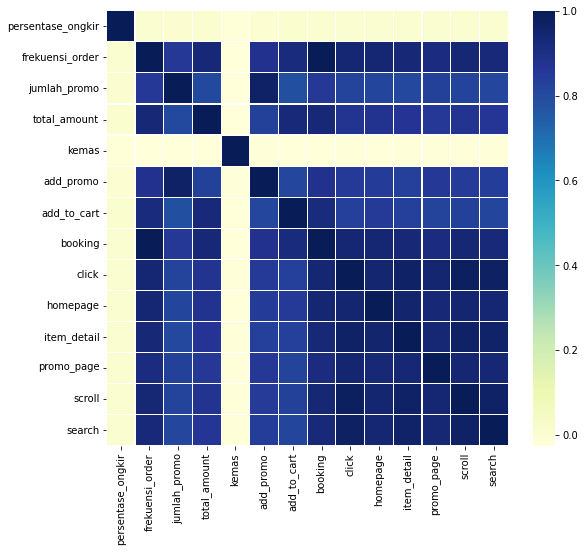

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


corrmat = numerik.corr()

f, ax = plt.subplots(figsize =(9, 8))
sns.heatmap(corrmat, ax = ax, cmap ="YlGnBu", linewidths = 0.1)

## Train Test Split

In [ ]:
df_model.head()

,age_category,Device_type_Android,Device_type_iPad,Device_type_iPhone,gender_F,gender_M,membership_label,persentase_ongkir,frekuensi_order,payment_method_Credit Card,...,add_promo,add_to_cart,booking,click,homepage,item_detail,promo_page,scroll,search,churn
0,2,1,0,0,0,1,0,1.000000,1,0,...,1,4,1,1,3,2,2,0,0,0
1,2,1,0,0,1,0,0,0.900000,10,1,...,3,10,10,34,29,12,11,22,16,1
2,2,1,0,0,1,0,0,1.000000,2,1,...,1,2,2,3,3,0,0,2,1,0
3,2,1,0,0,0,1,0,0.906977,43,1,...,12,53,43,178,169,105,39,139,90,1
4,2,1,0,0,1,0,0,0.000000,1,0,...,0,3,1,0,1,0,0,1,2,0


In [ ]:
df_model_a=df_model

In [ ]:
from sklearn.model_selection import train_test_split

##partition data into data training and data testing
train,test = train_test_split(df_model_a,test_size = 0.20 ,random_state = 123)
    
##seperating dependent and independent variables on training and testing data
train_X = train.drop(labels='churn',axis=1)
train_Y = train['churn'].astype('int')
test_X  = test.drop(labels='churn',axis=1)
test_Y  = test['churn'].astype('int')

## SMOTE

In [ ]:
#Proportion before smote
train_Y.value_counts()

1    2106
0     898
Name: churn, dtype: int64

In [ ]:
from imblearn.over_sampling import SMOTE

#handle imbalance class using oversampling minority class with smote method
os = SMOTE(sampling_strategy='minority',random_state = 123,k_neighbors=5)
train_smote_X,train_smote_Y = os.fit_resample(train_X,train_Y)
train_smote_X = pd.DataFrame(data = train_smote_X,columns=train_X.columns)
train_smote_Y = pd.DataFrame(data = train_smote_Y)

In [ ]:
#Proportion after smote
train_smote_Y.value_counts()

churn
0        2106
1        2106
dtype: int64

# Modeling

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import recall_score, confusion_matrix, precision_score, f1_score, accuracy_score, classification_report

## Baseline Model (Logistic Regresion)

In [ ]:
# Linier Regresion
train_X = train_smote_X
train_Y = train_smote_Y

In [ ]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(train_X, train_Y)
# get predictions from best model above
pred_test = lr.predict(test_X)
pred_train = lr.predict(train_X)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


In [ ]:
print("Analysis Model LR")
print("")
print("Analysis Metric Eror Model Training")
from sklearn.metrics import classification_report
target_names = ['notCHURN','CHURN']
print(classification_report(train_Y, pred_train, target_names=target_names))
from sklearn.metrics import confusion_matrix
print('confusion_matrix : ') 
print(confusion_matrix(train_Y, pred_train))
from sklearn.metrics import f1_score
print("accuracy_score : ", accuracy_score(train_Y, pred_train))
print("f1_score macro : ",f1_score(train_Y, pred_train, average='macro'))
print("f1_score micro : ",f1_score(train_Y, pred_train, average='micro'))
print("f1_score weighted : ", f1_score(train_Y, pred_train, average='weighted'))
print("f1_score : ", f1_score(train_Y, pred_train, average=None))
print("")
print("")
print("Analysis Metric Eror Model Testing")
from sklearn.metrics import classification_report
target_names = ['notCHURN','CHURN']
print(classification_report(test_Y, pred_test, target_names=target_names))
from sklearn.metrics import confusion_matrix
print('confusion_matrix : ') 
print(confusion_matrix(test_Y, pred_test))
from sklearn.metrics import f1_score
print("accuracy_score : ", accuracy_score(test_Y, pred_test))
print("f1_score macro : ",f1_score(test_Y, pred_test, average='macro'))
print("f1_score micro : ",f1_score(test_Y, pred_test, average='micro'))
print("f1_score weighted : ", f1_score(test_Y, pred_test, average='weighted'))
print("f1_score : ", f1_score(test_Y, pred_test, average=None))

Analysis Model LR

Analysis Metric Eror Model Training
              precision    recall  f1-score   support

    notCHURN       0.00      0.00      0.00      2106
       CHURN       0.50      1.00      0.67      2106

    accuracy                           0.50      4212
   macro avg       0.25      0.50      0.33      4212
weighted avg       0.25      0.50      0.33      4212

confusion_matrix : 
[[   0 2106]
 [   0 2106]]
accuracy_score :  0.5
f1_score macro :  0.3333333333333333
f1_score micro :  0.5
f1_score weighted :  0.3333333333333333
f1_score :  [0.         0.66666667]


Analysis Metric Eror Model Testing
              precision    recall  f1-score   support

    notCHURN       0.00      0.00      0.00       255
       CHURN       0.66      1.00      0.80       496

    accuracy                           0.66       751
   macro avg       0.33      0.50      0.40       751
weighted avg       0.44      0.66      0.53       751

confusion_matrix : 
[[  0 255]
 [  0 496]]
accurac

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to

## Model Lain

### KNN

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors = 2) 
knn_model.fit(train_smote_X,train_smote_Y)
predicted_y = knn_model.predict(test_X)
accuracy_knn = knn_model.score(test_X,test_Y)
print("KNN accuracy:",accuracy_knn)

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


KNN accuracy: 0.7882822902796272


In [ ]:
knn_model = KNeighborsClassifier(n_neighbors = 3) 
knn_model.fit(train_smote_X,train_smote_Y)
predicted_y = knn_model.predict(test_X)
accuracy_knn = knn_model.score(test_X,test_Y)
print("KNN accuracy:",accuracy_knn)

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


KNN accuracy: 0.8162450066577897


In [ ]:
knn_model = KNeighborsClassifier(n_neighbors = 6) 
knn_model.fit(train_smote_X,train_smote_Y)
predicted_y = knn_model.predict(test_X)
accuracy_knn = knn_model.score(test_X,test_Y)
print("KNN accuracy:",accuracy_knn)

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


KNN accuracy: 0.833555259653795


In [ ]:
knn_model = KNeighborsClassifier(n_neighbors = 50) 
knn_model.fit(train_smote_X,train_smote_Y)
predicted_y = knn_model.predict(test_X)
accuracy_knn = knn_model.score(test_X,test_Y)
print("KNN accuracy:",accuracy_knn)

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


KNN accuracy: 0.8548601864181092


### Naive Bayes

In [ ]:
from sklearn.naive_bayes import MultinomialNB
nb=MultinomialNB()
nb.fit(train_smote_X, train_smote_Y)
# get predictions from best model above
pred_test = nb.predict(test_X)
pred_train = nb.predict(train_smote_X)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


In [ ]:
print("Analysis Model NB")
print("")
print("Analysis Metric Eror Model Training")
from sklearn.metrics import classification_report
target_names = ['notchurn','churn']
print(classification_report(train_smote_Y, pred_train, target_names=target_names))
from sklearn.metrics import confusion_matrix
print('confusion_matrix : ') 
print(confusion_matrix(train_smote_Y, pred_train))
from sklearn.metrics import f1_score
print("accuracy_score : ", accuracy_score(train_smote_Y, pred_train))
print("f1_score macro : ",f1_score(train_smote_Y, pred_train, average='macro'))
print("f1_score micro : ",f1_score(train_smote_Y, pred_train, average='micro'))
print("f1_score weighted : ", f1_score(train_smote_Y, pred_train, average='weighted'))
print("f1_score : ", f1_score(train_smote_Y, pred_train, average=None))
print("")
print("")
print("Analysis Metric Eror Model Testing")
from sklearn.metrics import classification_report
target_names = ['notchurn','churn']
print(classification_report(test_Y, pred_test, target_names=target_names))
from sklearn.metrics import confusion_matrix
print('confusion_matrix : ') 
print(confusion_matrix(test_Y, pred_test))
from sklearn.metrics import f1_score
print("accuracy_score : ", accuracy_score(test_Y, pred_test))
print("f1_score macro : ",f1_score(test_Y, pred_test, average='macro'))
print("f1_score micro : ",f1_score(test_Y, pred_test, average='micro'))
print("f1_score weighted : ", f1_score(test_Y, pred_test, average='weighted'))
print("f1_score : ", f1_score(test_Y, pred_test, average=None))

Analysis Model NB

Analysis Metric Eror Model Training
              precision    recall  f1-score   support

    notchurn       0.66      0.76      0.71      2106
       churn       0.72      0.61      0.66      2106

    accuracy                           0.69      4212
   macro avg       0.69      0.69      0.69      4212
weighted avg       0.69      0.69      0.69      4212

confusion_matrix : 
[[1608  498]
 [ 820 1286]]
accuracy_score :  0.6870845204178537
f1_score macro :  0.6852449870331334
f1_score micro :  0.6870845204178537
f1_score weighted :  0.6852449870331333
f1_score :  [0.70930745 0.66118252]


Analysis Metric Eror Model Testing
              precision    recall  f1-score   support

    notchurn       0.49      0.71      0.58       255
       churn       0.81      0.62      0.70       496

    accuracy                           0.65       751
   macro avg       0.65      0.67      0.64       751
weighted avg       0.70      0.65      0.66       751

confusion_matrix : 


### Decision Tree

In [ ]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {'max_features': ['auto', 'sqrt', 'log2'],
              'ccp_alpha': [0.05, 0.1, .01, .001],
              'max_depth' : [5, 6, 7, 8, 9],
              'criterion' :['gini', 'entropy']
             }
tree_clas = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator=tree_clas, param_grid=param_grid, cv=2, verbose=True)
grid_search.fit(train_smote_X, train_smote_Y)

Fitting 2 folds for each of 120 candidates, totalling 240 fits


GridSearchCV(cv=2, estimator=DecisionTreeClassifier(),
             param_grid={'ccp_alpha': [0.05, 0.1, 0.01, 0.001],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 6, 7, 8, 9],
                         'max_features': ['auto', 'sqrt', 'log2']},
             verbose=True)

In [ ]:
#mencari parameter terbaik menggunakan gridCV dengan hyperparamter tuning
final_model = grid_search.best_estimator_
final_model

DecisionTreeClassifier(ccp_alpha=0.001, max_depth=6, max_features='auto')

In [ ]:
#Training the model
tree_clas = DecisionTreeClassifier()
tree_clas.fit(train_smote_X, train_smote_Y)
pred_test = tree_clas.predict(test_X)
pred_train = tree_clas.predict(train_smote_X)

In [ ]:
print("Analysis Model DTR")
print("")
print("Analysis Metric Eror Model Training")
from sklearn.metrics import classification_report
target_names = ['notchurn','churn']
print(classification_report(train_smote_Y, pred_train, target_names=target_names))
from sklearn.metrics import confusion_matrix
print('confusion_matrix : ') 
print(confusion_matrix(train_smote_Y, pred_train))
from sklearn.metrics import f1_score, accuracy_score
print("accuracy_score : ", accuracy_score(train_smote_Y, pred_train))
print("f1_score macro : ",f1_score(train_smote_Y, pred_train, average='macro'))
print("f1_score micro : ",f1_score(train_smote_Y, pred_train, average='micro'))
print("f1_score weighted : ", f1_score(train_smote_Y, pred_train, average='weighted'))
print("f1_score : ", f1_score(train_smote_Y, pred_train, average=None))
print("")
print("")
print("Analysis Metric Eror Model Testing")
from sklearn.metrics import classification_report
target_names = ['notchurn','churn']
print(classification_report(test_Y, pred_test, target_names=target_names))
from sklearn.metrics import confusion_matrix
print('confusion_matrix : ') 
print(confusion_matrix(test_Y, pred_test))
from sklearn.metrics import f1_score
print("accuracy_score : ", accuracy_score(test_Y, pred_test))
print("f1_score macro : ",f1_score(test_Y, pred_test, average='macro'))
print("f1_score micro : ",f1_score(test_Y, pred_test, average='micro'))
print("f1_score weighted : ", f1_score(test_Y, pred_test, average='weighted'))
print("f1_score : ", f1_score(test_Y, pred_test, average=None))

Analysis Model DTR

Analysis Metric Eror Model Training
              precision    recall  f1-score   support

    notchurn       1.00      1.00      1.00      2106
       churn       1.00      1.00      1.00      2106

    accuracy                           1.00      4212
   macro avg       1.00      1.00      1.00      4212
weighted avg       1.00      1.00      1.00      4212

confusion_matrix : 
[[2106    0]
 [   0 2106]]
accuracy_score :  1.0
f1_score macro :  1.0
f1_score micro :  1.0
f1_score weighted :  1.0
f1_score :  [1. 1.]


Analysis Metric Eror Model Testing
              precision    recall  f1-score   support

    notchurn       0.94      0.93      0.93       255
       churn       0.96      0.97      0.97       496

    accuracy                           0.96       751
   macro avg       0.95      0.95      0.95       751
weighted avg       0.96      0.96      0.96       751

confusion_matrix : 
[[237  18]
 [ 15 481]]
accuracy_score :  0.9560585885486018
f1_score macro 

In [ ]:
dtc = grid_search.fit(train_smote_X, train_smote_Y)

Fitting 2 folds for each of 120 candidates, totalling 240 fits


In [ ]:
from sklearn.metrics import plot_roc_curve,plot_confusion_matrix,accuracy_score,confusion_matrix
def Model(model):
    global train_smote_X, train_smote_Y, test_X, test_Y
    print(type(model).__name__)
    pred = model.predict(test_X)
    acs = accuracy_score(test_Y,pred)
    print("Accuracy Score             :",acs)
    
    plot_confusion_matrix(model,train_smote_X, train_smote_Y,cmap="Reds")
    plt.title("Confusion Matrix")
    plt.show()

In [ ]:
def Check(list_of_disp):
    ax = plt.gca()
    for i in list_of_disp: 
        i.plot(ax=ax)
    plt.plot([0,1],[0,1],"--",color="k",alpha=0.7)
    plt.title("ROC Curve of Classifiers")
    plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.


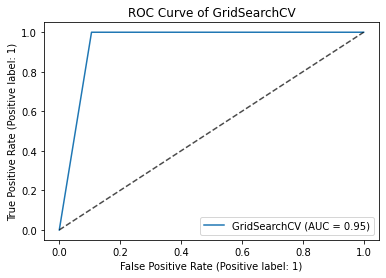

In [ ]:
knn_disp = plot_roc_curve(dtc, test_X, test_Y)
plt.title("ROC Curve of {}".format(type(dtc).__name__))
plt.plot([0,1],[0,1],"--",color="k",alpha=0.7)
plt.show()

### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(random_state=123)
param_grid = { 
    'n_estimators': [200, 500,1000],
    'max_features': ['auto','log2'],
    'criterion' :['entropy','gini']
}

In [ ]:
from sklearn.model_selection import GridSearchCV
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 2)
CV_rfc.fit(train_smote_X, train_smote_Y)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/usr/local/lib/python3.7/dist-packages/sklearn/m

GridSearchCV(cv=2, estimator=RandomForestClassifier(random_state=123),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_features': ['auto', 'log2'],
                         'n_estimators': [200, 500, 1000]})

In [ ]:
#mencari parameter terbaik
CV_rfc.best_params_

{'criterion': 'gini', 'max_features': 'auto', 'n_estimators': 200}

In [ ]:
# get predictions from best model above
pred_test = CV_rfc.predict(test_X)
pred_train = CV_rfc.predict(train_smote_X)

In [ ]:
print("Analysis Model RF")
print("")
print("Analysis Metric Eror Model Training")
from sklearn.metrics import classification_report
target_names = ['NotChurn','Churn']
print(classification_report(train_smote_Y, pred_train, target_names=target_names))
from sklearn.metrics import confusion_matrix
print('confusion_matrix : ') 
print(confusion_matrix(train_smote_Y, pred_train))
from sklearn.metrics import f1_score, accuracy_score
print("accuracy_score : ", accuracy_score(train_smote_Y, pred_train))
print("f1_score macro : ",f1_score(train_smote_Y, pred_train, average='macro'))
print("f1_score micro : ",f1_score(train_smote_Y, pred_train, average='micro'))
print("f1_score weighted : ", f1_score(train_smote_Y, pred_train, average='weighted'))
print("f1_score : ", f1_score(train_smote_Y, pred_train, average=None))
print("")
print("")
print("Analysis Metric Eror Model Testing")
from sklearn.metrics import classification_report
target_names = ['NotChurn','Churn']
print(classification_report(test_Y, pred_test, target_names=target_names))
from sklearn.metrics import confusion_matrix
print('confusion_matrix : ') 
print(confusion_matrix(test_Y, pred_test))
from sklearn.metrics import f1_score
print("accuracy_score : ", accuracy_score(test_Y, pred_test))
print("f1_score macro : ",f1_score(test_Y, pred_test, average='macro'))
print("f1_score micro : ",f1_score(test_Y, pred_test, average='micro'))
print("f1_score weighted : ", f1_score(test_Y, pred_test, average='weighted'))
print("f1_score : ", f1_score(test_Y, pred_test, average=None))

Analysis Model RF

Analysis Metric Eror Model Training
              precision    recall  f1-score   support

    NotChurn       1.00      1.00      1.00      2106
       Churn       1.00      1.00      1.00      2106

    accuracy                           1.00      4212
   macro avg       1.00      1.00      1.00      4212
weighted avg       1.00      1.00      1.00      4212

confusion_matrix : 
[[2106    0]
 [   0 2106]]
accuracy_score :  1.0
f1_score macro :  1.0
f1_score micro :  1.0
f1_score weighted :  1.0
f1_score :  [1. 1.]


Analysis Metric Eror Model Testing
              precision    recall  f1-score   support

    NotChurn       0.99      0.89      0.94       255
       Churn       0.95      1.00      0.97       496

    accuracy                           0.96       751
   macro avg       0.97      0.95      0.96       751
weighted avg       0.96      0.96      0.96       751

confusion_matrix : 
[[228  27]
 [  2 494]]
accuracy_score :  0.9613848202396804
f1_score macro :

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.


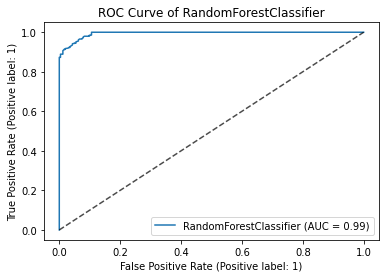

In [ ]:
rfc = RandomForestClassifier(n_estimators=200,criterion='gini', max_features='auto').fit(train_smote_X,train_smote_Y)

rfc_disp = plot_roc_curve(rfc, test_X, test_Y)
plt.title("ROC Curve of {}".format(type(rfc).__name__))
plt.plot([0,1],[0,1],"--",color="k",alpha=0.7)
plt.show()

**Feature importance**

In [ ]:
# create the classifier with n_estimators = 100

clf = RandomForestClassifier(n_estimators=200,criterion='gini', max_features='auto')

# fit the model to the training set
clf.fit(train_smote_X, train_smote_Y)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


RandomForestClassifier(n_estimators=200)

In [ ]:
# view the feature scores

feature_scores = pd.Series(clf.feature_importances_, index=train_smote_X.columns).sort_values(ascending=False)

feature_scores

booking                              0.220751
frekuensi_order                      0.203038
homepage                             0.117707
total_amount                         0.070489
scroll                               0.060780
add_to_cart                          0.057090
search                               0.054940
click                                0.043784
item_detail                          0.036348
promo_page                           0.030884
jumlah_promo                         0.020261
add_promo                            0.016086
kemas                                0.011953
persentase_ongkir                    0.009151
age_category                         0.005849
gender_F                             0.003726
gender_M                             0.003098
payment_method_Credit Card           0.002851
payment_method_Debit Card            0.002481
Device_type_iPhone                   0.002303
home_location_Jakarta Raya           0.002049
payment_method_Gopay              

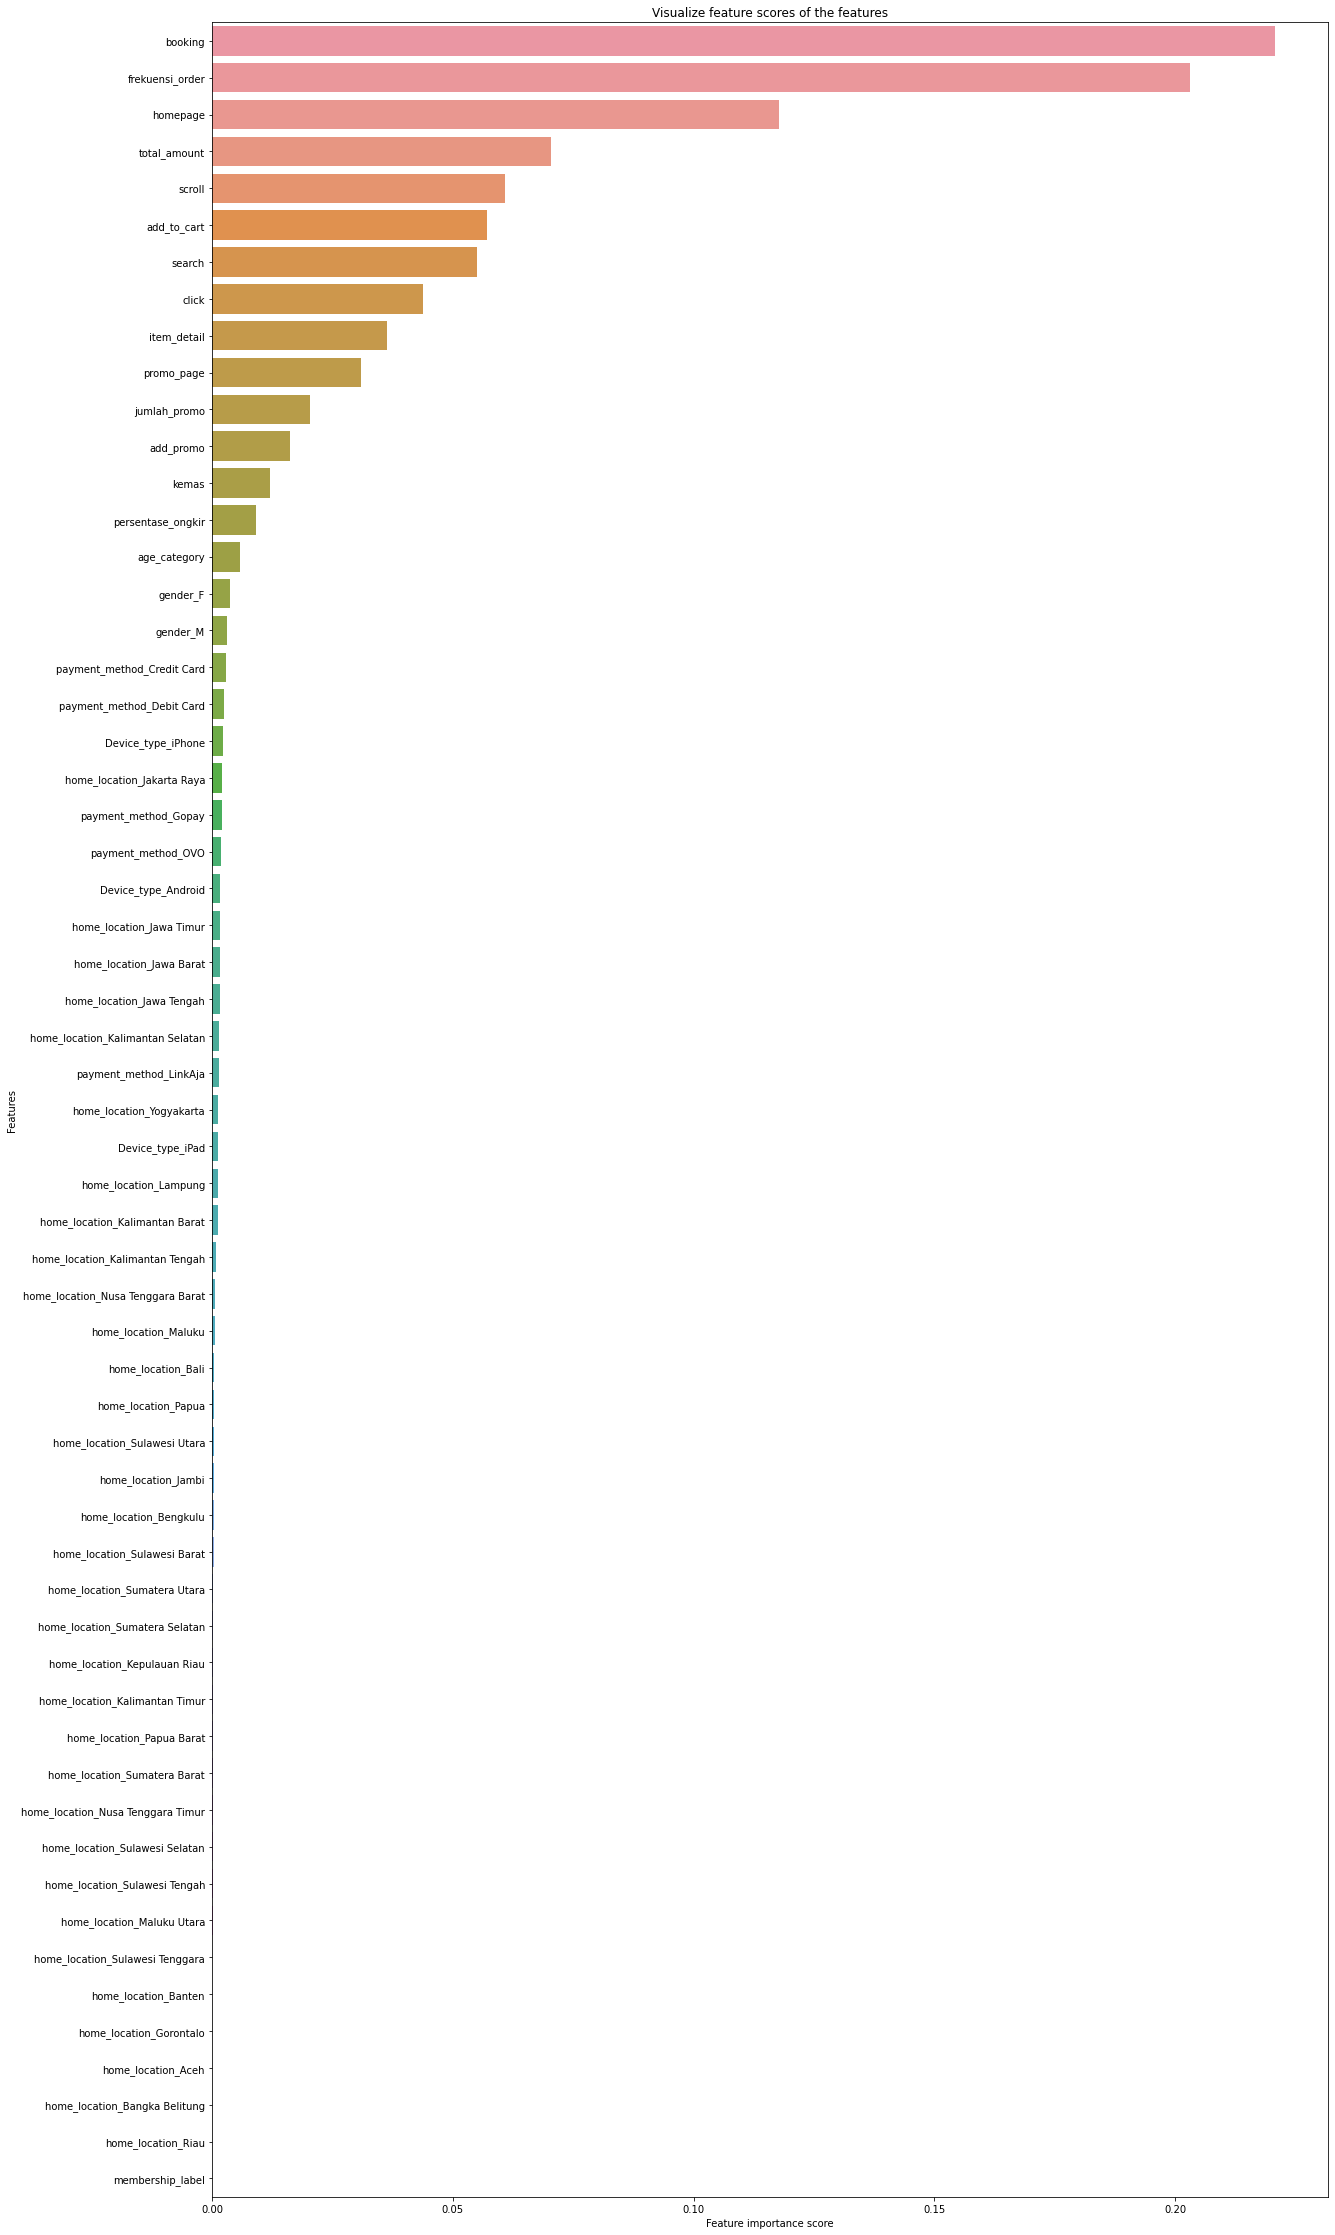

In [ ]:
# Creating a seaborn bar plot

f, ax = plt.subplots(figsize=(20, 40))
ax = sns.barplot(x=feature_scores, y=feature_scores.index, data=df)
ax.set_title("Visualize feature scores of the features")
ax.set_yticklabels(feature_scores.index)
ax.set_xlabel("Feature importance score")
ax.set_ylabel("Features")
plt.show()

### XGB

In [ ]:
from xgboost import XGBClassifier
from sklearn import svm
from sklearn.model_selection import GridSearchCV
  
# defining parameter range
param_grid = {"learning_rate": [0.01, 0.1],
    "max_depth":[3,5],
    "subsample":[0.5, 1.0],}
  
grid = GridSearchCV(XGBClassifier(), param_grid, refit = True, verbose = 3)
  
# fitting the model for grid search
grid.fit(train_smote_X, train_smote_Y)

# get predictions from best model above
pred_test = grid.predict(test_X)
pred_train = grid.predict(train_smote_X)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


[CV 1/5] END learning_rate=0.01, max_depth=3, subsample=0.5;, score=0.930 total time=   0.9s


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


[CV 2/5] END learning_rate=0.01, max_depth=3, subsample=0.5;, score=0.940 total time=   0.7s


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


[CV 3/5] END learning_rate=0.01, max_depth=3, subsample=0.5;, score=0.980 total time=   0.7s


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


[CV 4/5] END learning_rate=0.01, max_depth=3, subsample=0.5;, score=0.980 total time=   0.7s


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


[CV 5/5] END learning_rate=0.01, max_depth=3, subsample=0.5;, score=0.986 total time=   0.7s


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


[CV 1/5] END learning_rate=0.01, max_depth=3, subsample=1.0;, score=0.930 total time=   0.6s


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


[CV 2/5] END learning_rate=0.01, max_depth=3, subsample=1.0;, score=0.940 total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


[CV 3/5] END learning_rate=0.01, max_depth=3, subsample=1.0;, score=0.980 total time=   0.6s


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


[CV 4/5] END learning_rate=0.01, max_depth=3, subsample=1.0;, score=0.980 total time=   0.6s


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


[CV 5/5] END learning_rate=0.01, max_depth=3, subsample=1.0;, score=0.986 total time=   0.6s


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


[CV 1/5] END learning_rate=0.01, max_depth=5, subsample=0.5;, score=0.930 total time=   0.8s


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


[CV 2/5] END learning_rate=0.01, max_depth=5, subsample=0.5;, score=0.941 total time=   0.9s


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


[CV 3/5] END learning_rate=0.01, max_depth=5, subsample=0.5;, score=0.985 total time=   0.9s


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


[CV 4/5] END learning_rate=0.01, max_depth=5, subsample=0.5;, score=0.986 total time=   0.9s


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


[CV 5/5] END learning_rate=0.01, max_depth=5, subsample=0.5;, score=0.987 total time=   0.9s


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


[CV 1/5] END learning_rate=0.01, max_depth=5, subsample=1.0;, score=0.929 total time=   0.8s


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


[CV 2/5] END learning_rate=0.01, max_depth=5, subsample=1.0;, score=0.940 total time=   0.7s


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


[CV 3/5] END learning_rate=0.01, max_depth=5, subsample=1.0;, score=0.974 total time=   0.7s


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


[CV 4/5] END learning_rate=0.01, max_depth=5, subsample=1.0;, score=0.979 total time=   0.8s


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


[CV 5/5] END learning_rate=0.01, max_depth=5, subsample=1.0;, score=0.987 total time=   0.8s


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


[CV 1/5] END learning_rate=0.1, max_depth=3, subsample=0.5;, score=0.926 total time=   0.7s


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


[CV 2/5] END learning_rate=0.1, max_depth=3, subsample=0.5;, score=0.943 total time=   0.7s


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


[CV 3/5] END learning_rate=0.1, max_depth=3, subsample=0.5;, score=0.981 total time=   0.7s


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


[CV 4/5] END learning_rate=0.1, max_depth=3, subsample=0.5;, score=0.989 total time=   0.7s


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


[CV 5/5] END learning_rate=0.1, max_depth=3, subsample=0.5;, score=0.990 total time=   0.7s


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


[CV 1/5] END learning_rate=0.1, max_depth=3, subsample=1.0;, score=0.925 total time=   0.6s


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


[CV 2/5] END learning_rate=0.1, max_depth=3, subsample=1.0;, score=0.943 total time=   0.6s


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


[CV 3/5] END learning_rate=0.1, max_depth=3, subsample=1.0;, score=0.982 total time=   0.6s


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


[CV 4/5] END learning_rate=0.1, max_depth=3, subsample=1.0;, score=0.983 total time=   0.6s


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


[CV 5/5] END learning_rate=0.1, max_depth=3, subsample=1.0;, score=0.992 total time=   0.6s


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


[CV 1/5] END learning_rate=0.1, max_depth=5, subsample=0.5;, score=0.925 total time=   1.0s


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


[CV 2/5] END learning_rate=0.1, max_depth=5, subsample=0.5;, score=0.941 total time=   1.0s


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


[CV 3/5] END learning_rate=0.1, max_depth=5, subsample=0.5;, score=0.980 total time=   1.0s


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


[CV 4/5] END learning_rate=0.1, max_depth=5, subsample=0.5;, score=0.986 total time=   1.0s


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


[CV 5/5] END learning_rate=0.1, max_depth=5, subsample=0.5;, score=0.988 total time=   1.0s


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


[CV 1/5] END learning_rate=0.1, max_depth=5, subsample=1.0;, score=0.925 total time=   0.8s


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


[CV 2/5] END learning_rate=0.1, max_depth=5, subsample=1.0;, score=0.941 total time=   0.8s


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


[CV 3/5] END learning_rate=0.1, max_depth=5, subsample=1.0;, score=0.976 total time=   0.8s


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


[CV 4/5] END learning_rate=0.1, max_depth=5, subsample=1.0;, score=0.988 total time=   0.8s


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


[CV 5/5] END learning_rate=0.1, max_depth=5, subsample=1.0;, score=0.996 total time=   0.8s


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


In [ ]:
print("Analysis Model XGBClassifier")
print("")
print("Analysis Metric Eror Model Training")
from sklearn.metrics import classification_report
target_names = ['NotChurn','Churn']
print(classification_report(train_smote_Y, pred_train, target_names=target_names))
from sklearn.metrics import confusion_matrix
print('confusion_matrix : ') 
print(confusion_matrix(train_smote_Y, pred_train))
from sklearn.metrics import f1_score, accuracy_score
print("accuracy_score : ", accuracy_score(train_smote_Y, pred_train))
print("f1_score macro : ",f1_score(train_smote_Y, pred_train, average='macro'))
print("f1_score micro : ",f1_score(train_smote_Y, pred_train, average='micro'))
print("f1_score weighted : ", f1_score(train_smote_Y, pred_train, average='weighted'))
print("f1_score : ", f1_score(train_smote_Y, pred_train, average=None))
print("")
print("")
print("Analysis Metric Eror Model Testing")
from sklearn.metrics import classification_report
target_names = ['NotChurn','Churn']
print(classification_report(test_Y, pred_test, target_names=target_names))
from sklearn.metrics import confusion_matrix
print('confusion_matrix : ') 
print(confusion_matrix(test_Y, pred_test))
from sklearn.metrics import f1_score
print("accuracy_score : ", accuracy_score(test_Y, pred_test))
print("f1_score macro : ",f1_score(test_Y, pred_test, average='macro'))
print("f1_score micro : ",f1_score(test_Y, pred_test, average='micro'))
print("f1_score weighted : ", f1_score(test_Y, pred_test, average='weighted'))
print("f1_score : ", f1_score(test_Y, pred_test, average=None))

Analysis Model XGBClassifier

Analysis Metric Eror Model Training
              precision    recall  f1-score   support

    NotChurn       1.00      0.96      0.98      2106
       Churn       0.96      1.00      0.98      2106

    accuracy                           0.98      4212
   macro avg       0.98      0.98      0.98      4212
weighted avg       0.98      0.98      0.98      4212

confusion_matrix : 
[[2028   78]
 [   7 2099]]
accuracy_score :  0.9798195631528965
f1_score macro :  0.9798138273534762
f1_score micro :  0.9798195631528965
f1_score weighted :  0.9798138273534762
f1_score :  [0.97947356 0.9801541 ]


Analysis Metric Eror Model Testing
              precision    recall  f1-score   support

    NotChurn       0.98      0.90      0.94       255
       Churn       0.95      0.99      0.97       496

    accuracy                           0.96       751
   macro avg       0.96      0.94      0.95       751
weighted avg       0.96      0.96      0.96       751

confusion

In [ ]:
#PARAMETER TERBAIK
grid.best_params_

{'learning_rate': 0.1, 'max_depth': 3, 'subsample': 0.5}

In [ ]:
model_gb = XGBClassifier(learning_rate= 0.1, max_depth= 3, subsample= 0.5)
model_gb.fit(train_smote_X, train_smote_Y)

XGBClassifier(subsample=0.5)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.


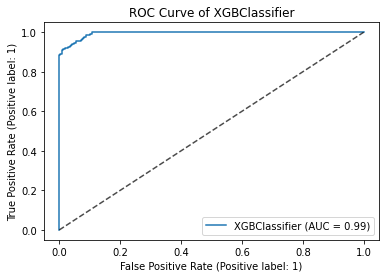

In [ ]:
xgb = model_gb.fit(train_smote_X,train_smote_Y)

xgb_disp = plot_roc_curve(xgb, test_X, test_Y)
plt.title("ROC Curve of {}".format(type(xgb).__name__))
plt.plot([0,1],[0,1],"--",color="k",alpha=0.7)
plt.show()

**feature importance XGB**

In [ ]:
imp = model_gb.get_booster().get_score(importance_type='gain')

In [ ]:
imp.items()

dict_items([('frekuensi_order', 138.22205063591844), ('total_amount', 3.8194779290368412), ('homepage', 7.989600423159999), ('payment_method_OVO', 4.22848616), ('kemas', 3.2836645914062497), ('click', 3.3924072489999997), ('home_location_Jawa Tengah', 3.8893380950000007), ('home_location_Kalimantan Selatan', 3.7355227775000004), ('Device_type_iPhone', 5.100480179999999), ('persentase_ongkir', 2.4537945742000002), ('age_category', 4.142795562), ('item_detail', 2.771293662812499), ('search', 3.394584048818182), ('add_promo', 3.3284071842857137), ('gender_F', 3.6468086131), ('payment_method_Gopay', 4.519353985), ('scroll', 3.0228775622857142), ('add_to_cart', 2.627485661428571), ('promo_page', 3.8383069875249993), ('payment_method_Debit Card', 3.9385998233333335), ('jumlah_promo', 4.007545372608696), ('payment_method_Credit Card', 3.9784450185714286), ('home_location_Jawa Barat', 3.3880075200000004), ('home_location_Jakarta Raya', 6.0233821899999995), ('payment_method_LinkAja', 1.94109233

In [ ]:
variable = []
importance = []
for key, data_list in imp.items():
    variable.append(key)
    importance.append(data_list)

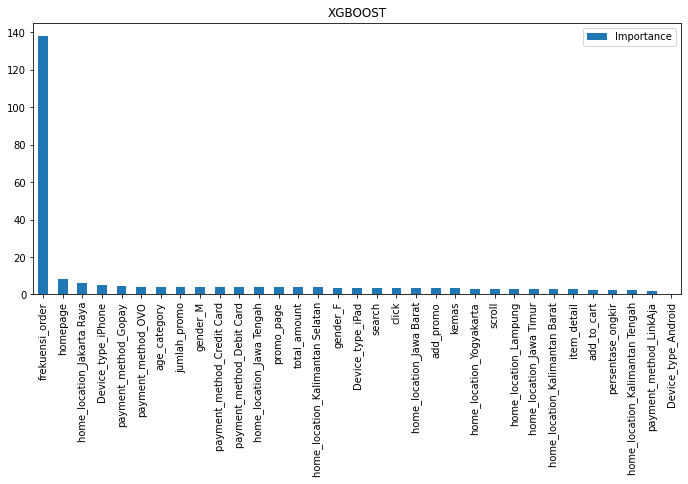

In [ ]:
coefs = pd.DataFrame(importance, columns=['Importance'], index=variable)
coefs = coefs.sort_values(by=['Importance'], ascending=False)
coefs.plot(kind='bar', figsize=(15,5))
plt.title('XGBOOST')
plt.subplots_adjust(left=0.3)

# Export